In [1]:
FNAME = '3dim'

# 00 Init

## Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting to use py files

In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [5]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [6]:
! pip install codes

## Import py files

In [7]:
# baseline : Env, Agent
# from codes.environment.reward5 import *
from codes.environment.reward5 import *
from codes.agent.newVectorDQN import *
from codes.net.basicWithBias import *
from codes.trainer.validShutDown import *
# from codes.tester.basic import *
from codes.tester.validShutDown import *
# import codes.trainer.trainerWithValidShutDown as Trainer


## Import Libraries

# 01 Info

## level dictionary

In [8]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [9]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.001
LEARN_DECAY = 0.25
LEARN_EPOCH = 50000
# LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.999975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 128
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

## env

In [10]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':0.3, 'no_progress' : -1},
                     dones={'win':True, 'lose':True, 'progress':False, 'guess':False, 'no_progress' : False},
                     dim2=False)

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS,
          in_channels=env.n_channel)

agent = Agent(env=env,
              net=net,
              MEM_SIZE=MEM_SIZE,
              MEM_SIZE_MIN=MEM_SIZE_MIN,
              BATCH_SIZE=BATCH_SIZE,
              LEARNING_RATE=LEARNING_RATE,
              LEARN_DECAY=LEARN_DECAY,
              LEARN_EPOCH=LEARN_EPOCH,
              # LEARN_MIN=LEARN_MIN,
              DISCOUNT=DISCOUNT,
              EPSILON=EPSILON,
              EPSILON_DECAY=EPSILON_DECAY,
              EPSILON_MIN=EPSILON_MIN,
              UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## TRAIN_PARAMETERS

In [11]:
EPISODES = 100000
PRINT_INTERVAL = 100
TRAIN_RENDER = False

TRAIN_TIMESTEPS = ['every timestep', 'every episodes']
TRAIN_TIMESTEP = TRAIN_TIMESTEPS[0]
VIUSAL_INTERVAL = 100

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

## valid agent in train

In [12]:
tester_agent = Agent(env=env,
                    net=net,
                    MEM_SIZE=MEM_SIZE,
                    MEM_SIZE_MIN=MEM_SIZE_MIN,
                    BATCH_SIZE=BATCH_SIZE,
                    LEARNING_RATE=LEARNING_RATE,
                    LEARN_DECAY=LEARN_DECAY,
                    # LEARN_MIN=LEARN_MIN,
                    LEARN_EPOCH=LEARN_EPOCH,
                    DISCOUNT=DISCOUNT,
                    EPSILON=EPSILON,
                    EPSILON_DECAY=EPSILON_DECAY,
                    EPSILON_MIN=EPSILON_MIN,
                    UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## main

### 이미 있는 모델 불러와 학습하기

In [25]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name=FNAME,
                    train_start=False,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEP,
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

- trainer 자체

In [ ]:
with open(os.path.join(trainer.total_path, f'{5*EPISODES}.pkl'), "rb") as f:
    trainer = pickle.load(f)

- 모델 파라미터만

In [17]:
with open(os.path.join(trainer.total_path, "500042epi_train : 0.92 | valid : 0.849 | success : 0.82.pkl"), "rb") as f:
    nns = pickle.load(f)

In [20]:
nns.keys()

dict_keys(['n_mines', 'total_episodes', 'final_model', 'best_model_train', 'best_model_valid', 'best_model_successed'])

In [21]:
checkpoint_nn = nns['final_model']

In [26]:
trainer.agent.model.load_state_dict(checkpoint_nn)
trainer.agent.target_model.load_state_dict(checkpoint_nn)

<All keys matched successfully>

In [38]:
# 기타 수정
trainer.agent.epsilon = 0.0001
trainer.agent.epsilon_min = 0.0001
trainer.agent.learning_rate = 0.00001
# trainer.episodes =

In [39]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

Valid n:1000, Median progress: 13.00, Median reward: 4.60, Win rate : 0.599
Valid n:1000, Median progress: 14.00, Median reward: 4.60, Win rate : 0.633
Valid n:1000, Median progress: 14.00, Median reward: 4.60, Win rate : 0.612
Valid n:1000, Median progress: 14.00, Median reward: 4.60, Win rate : 0.599
Valid n:1000, Median progress: 14.00, Median reward: 4.60, Win rate : 0.586
Valid n:1000, Median progress: 14.00, Median reward: 4.60, Win rate : 0.578
Valid n:1000, Median progress: 14.00, Median reward: 4.60, Win rate : 0.584
Valid n:1000, Median progress: 13.00, Median reward: 4.60, Win rate : 0.61
Valid n:1000, Median progress: 14.00, Median reward: 4.60, Win rate : 0.624
Valid n:1000, Median progress: 13.50, Median reward: 4.40, Win rate : 0.603
Episode: [100000/100]| Median progress: 14.00 | Median reward: 4.35 | Win rate : 0.590 | Epsilon: 0.00
Episode: [100000/200]| Median progress: 13.50 | Median reward: 4.60 | Win rate : 0.630 | Epsilon: 0.00
valid latest successed model
Valid 

KeyboardInterrupt: 

Episode: [50000/100]| Median progress: 7.00 | Median reward: -1.80 | Win rate : 0.000 | Epsilon: 0.95
Episode: [50000/200]| Median progress: 7.50 | Median reward: -2.15 | Win rate : 0.000 | Epsilon: 0.93
Episode: [50000/300]| Median progress: 7.00 | Median reward: -2.10 | Win rate : 0.000 | Epsilon: 0.91
Episode: [50000/400]| Median progress: 8.00 | Median reward: -2.80 | Win rate : 0.000 | Epsilon: 0.89
Episode: [50000/500]| Median progress: 6.00 | Median reward: -1.75 | Win rate : 0.000 | Epsilon: 0.87
Episode: [50000/600]| Median progress: 6.00 | Median reward: -1.60 | Win rate : 0.000 | Epsilon: 0.85
Episode: [50000/700]| Median progress: 8.00 | Median reward: -1.50 | Win rate : 0.000 | Epsilon: 0.83
Episode: [50000/800]| Median progress: 7.00 | Median reward: -1.40 | Win rate : 0.000 | Epsilon: 0.81
Episode: [50000/900]| Median progress: 6.00 | Median reward: -1.40 | Win rate : 0.000 | Epsilon: 0.79
Episode: [50000/1000]| Median progress: 6.00 | Median reward: -1.10 | Win rate : 0

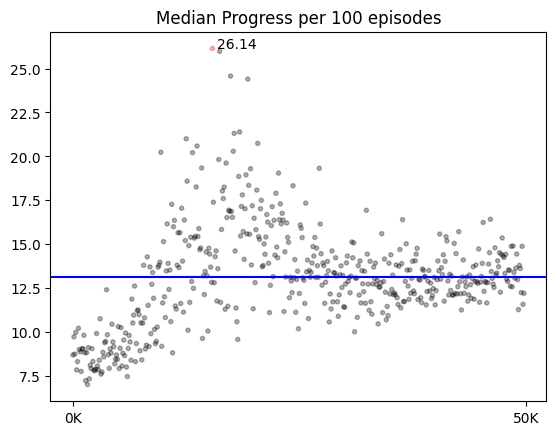

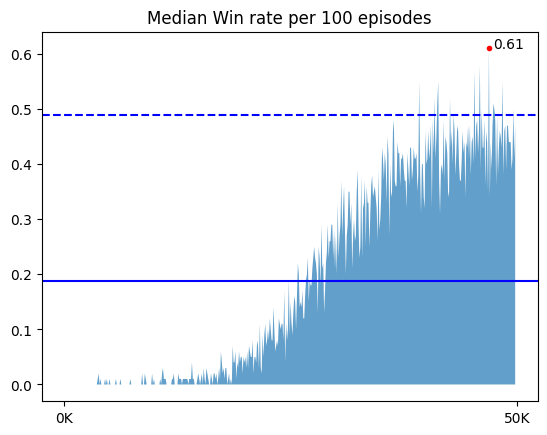

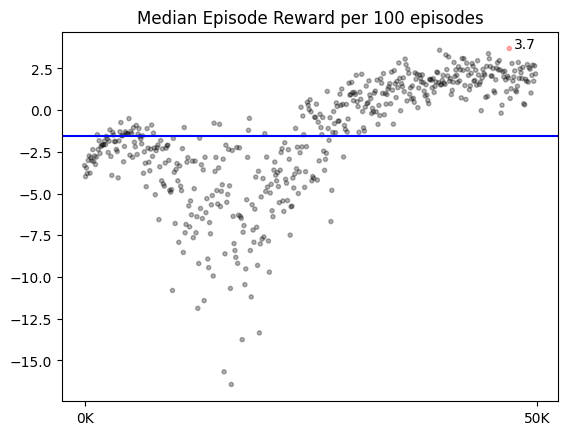

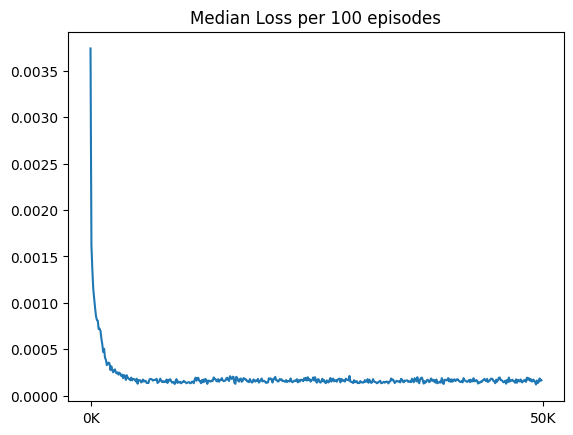

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/3dim'가 생성되었습니다.
모델이 저장되었습니다.


In [ ]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name=FNAME,
                    train_start=True,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEP,
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

Episode: [50000/100]| Median progress: 14.00 | Median reward: 4.00 | Win rate : 0.530 | Epsilon: 0.01
Episode: [50000/200]| Median progress: 12.00 | Median reward: 3.60 | Win rate : 0.550 | Epsilon: 0.01
Episode: [50000/300]| Median progress: 11.50 | Median reward: 2.60 | Win rate : 0.430 | Epsilon: 0.01
Episode: [50000/400]| Median progress: 12.00 | Median reward: 2.70 | Win rate : 0.470 | Epsilon: 0.01
Episode: [50000/500]| Median progress: 13.50 | Median reward: 3.70 | Win rate : 0.500 | Epsilon: 0.01
Episode: [50000/600]| Median progress: 13.00 | Median reward: 2.60 | Win rate : 0.460 | Epsilon: 0.01
Episode: [50000/700]| Median progress: 13.00 | Median reward: 3.70 | Win rate : 0.550 | Epsilon: 0.01
Episode: [50000/800]| Median progress: 12.00 | Median reward: 3.45 | Win rate : 0.470 | Epsilon: 0.01
Episode: [50000/900]| Median progress: 13.00 | Median reward: 4.30 | Win rate : 0.530 | Epsilon: 0.01
Episode: [50000/1000]| Median progress: 13.50 | Median reward: 2.80 | Win rate : 0

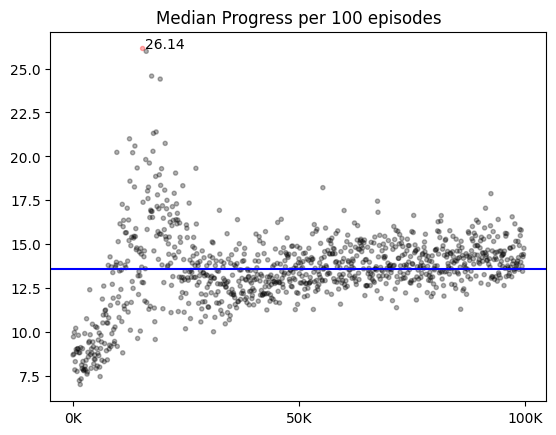

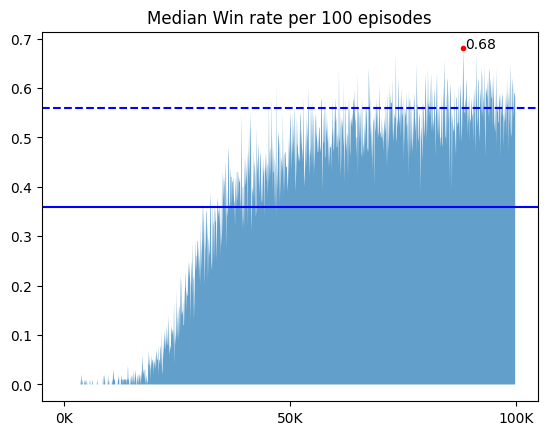

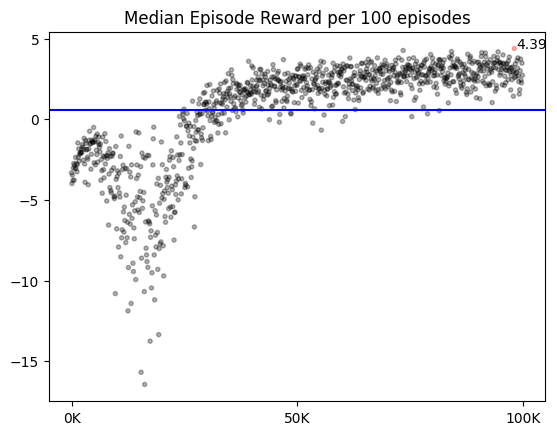

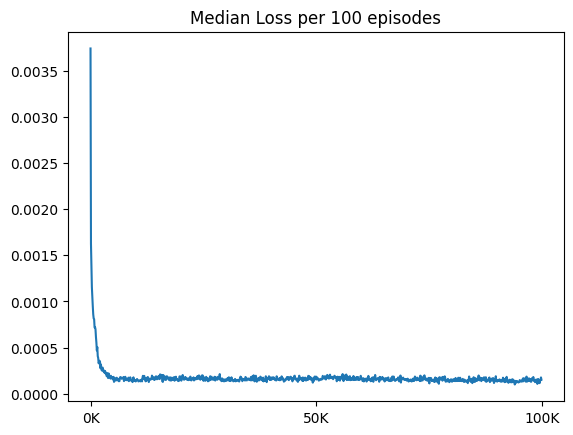

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/3dim'는 이미 존재합니다.
모델이 저장되었습니다.


In [ ]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

In [ ]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

Episode: [100000/100]| Median progress: 6.50 | Median reward: -1.70 | Win rate : 0.000 | Epsilon: 0.95
Episode: [100000/200]| Median progress: 7.00 | Median reward: -1.80 | Win rate : 0.000 | Epsilon: 0.93
Episode: [100000/300]| Median progress: 7.00 | Median reward: -1.20 | Win rate : 0.000 | Epsilon: 0.91
Episode: [100000/400]| Median progress: 6.50 | Median reward: -1.50 | Win rate : 0.000 | Epsilon: 0.89
Episode: [100000/500]| Median progress: 8.00 | Median reward: -1.70 | Win rate : 0.000 | Epsilon: 0.87
Episode: [100000/600]| Median progress: 6.00 | Median reward: -1.40 | Win rate : 0.000 | Epsilon: 0.85
Episode: [100000/700]| Median progress: 8.00 | Median reward: -1.75 | Win rate : 0.000 | Epsilon: 0.83
Episode: [100000/800]| Median progress: 8.00 | Median reward: -1.50 | Win rate : 0.000 | Epsilon: 0.81
Episode: [100000/900]| Median progress: 7.00 | Median reward: -1.60 | Win rate : 0.000 | Epsilon: 0.79
Episode: [100000/1000]| Median progress: 7.00 | Median reward: -1.40 | Wi

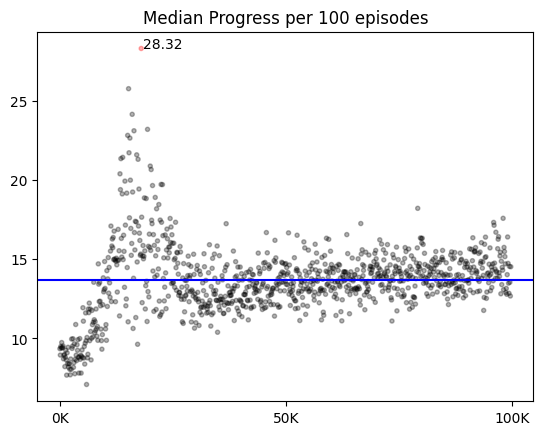

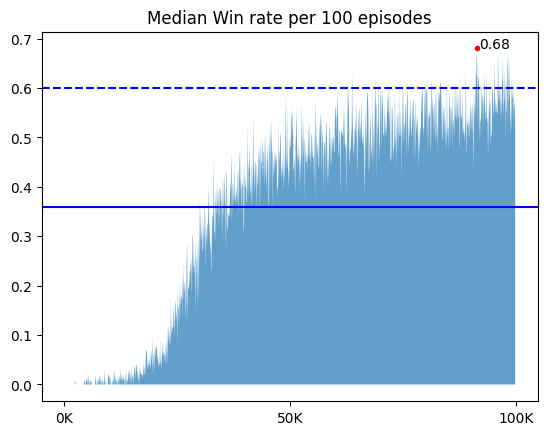

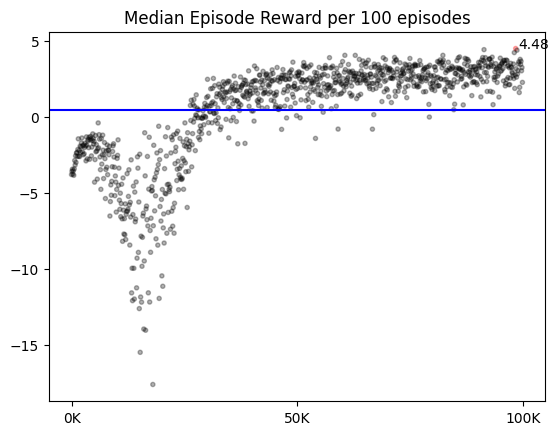

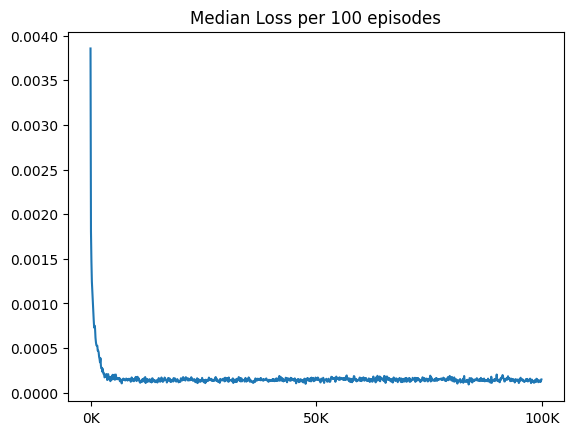

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/3dim'는 이미 존재합니다.
모델이 저장되었습니다.


In [ ]:
trainer = Trainer(env=env,
                    agent=agent,
                    tester_agent=tester_agent,
                    name=FNAME,
                    train_start=True,
                    EPISODES = EPISODES,
                    PRINT_INTERVAL = PRINT_INTERVAL,
                    TRAIN_RENDER = TRAIN_RENDER,
                    TRAIN_TIMESTEP = TRAIN_TIMESTEP,
                    VIUSAL_INTERVAL = VIUSAL_INTERVAL,
                    VALID_SAMPLE = VALID_SAMPLE,
                    VALID_INTERVAL = VALID_INTERVAL)

In [ ]:
trainer.episodes = 100000

Episode: [200000/100]| Median progress: 13.00 | Median reward: 3.70 | Win rate : 0.530 | Epsilon: 0.01
Episode: [200000/200]| Median progress: 12.00 | Median reward: 3.55 | Win rate : 0.520 | Epsilon: 0.01
Episode: [200000/300]| Median progress: 13.00 | Median reward: 4.15 | Win rate : 0.580 | Epsilon: 0.01
Episode: [200000/400]| Median progress: 14.50 | Median reward: 4.00 | Win rate : 0.550 | Epsilon: 0.01
Episode: [200000/500]| Median progress: 13.00 | Median reward: 3.70 | Win rate : 0.560 | Epsilon: 0.01
Episode: [200000/600]| Median progress: 12.00 | Median reward: 3.30 | Win rate : 0.550 | Epsilon: 0.01
Episode: [200000/700]| Median progress: 15.00 | Median reward: 4.20 | Win rate : 0.570 | Epsilon: 0.01
Episode: [200000/800]| Median progress: 14.50 | Median reward: 4.40 | Win rate : 0.610 | Epsilon: 0.01
Episode: [200000/900]| Median progress: 13.00 | Median reward: 4.00 | Win rate : 0.520 | Epsilon: 0.01
Episode: [200000/1000]| Median progress: 13.50 | Median reward: 4.00 | Wi

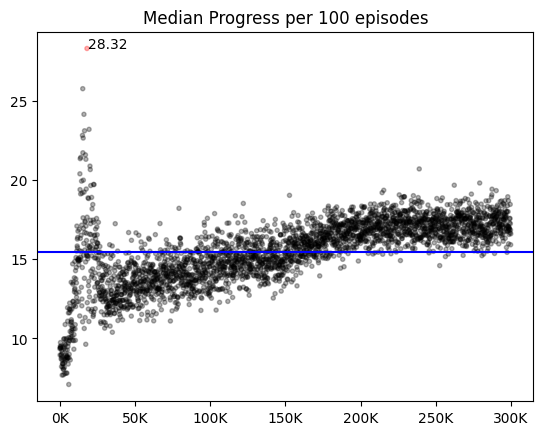

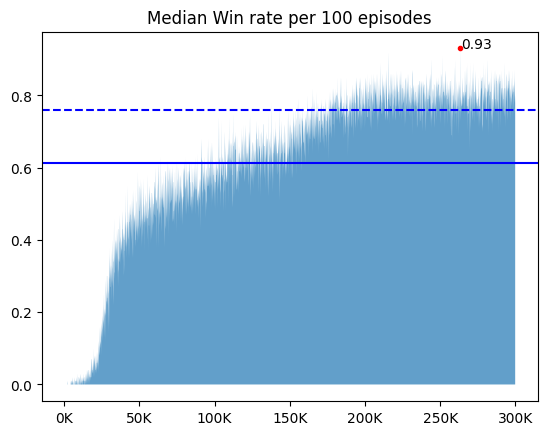

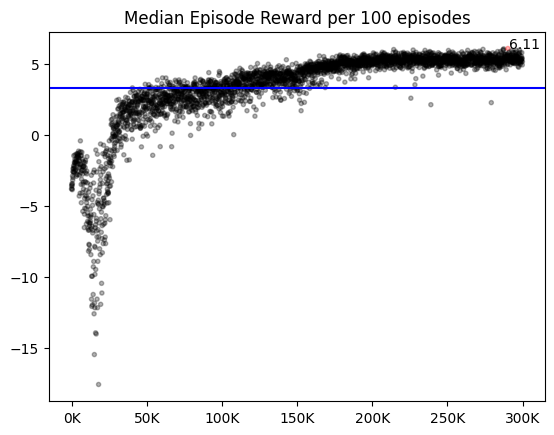

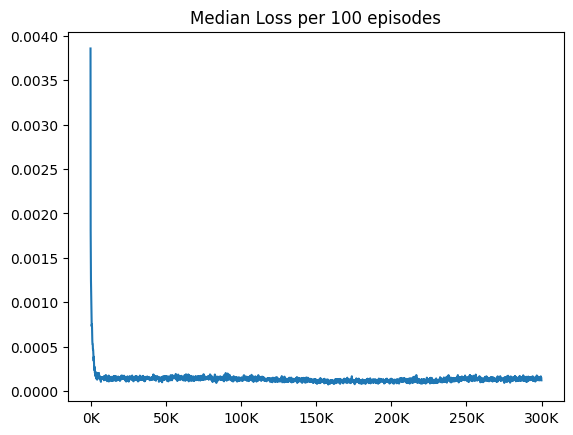

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/3dim'는 이미 존재합니다.
모델이 저장되었습니다.


In [ ]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

In [ ]:
with open(os.path.join(trainer.total_path, f'{len(trainer.progress_list)}.pkl'), "wb") as f:
    pickle.dump(trainer, f)

PicklingError: Can't pickle <class '__main__.MinesweeperEnv'>: it's not the same object as __main__.MinesweeperEnv

Episode: [200000/100]| Median progress: 18.00 | Median reward: 5.95 | Win rate : 0.830 | Epsilon: 0.01
Episode: [200000/200]| Median progress: 17.00 | Median reward: 5.65 | Win rate : 0.910 | Epsilon: 0.01
Episode: [200000/300]| Median progress: 18.00 | Median reward: 5.80 | Win rate : 0.860 | Epsilon: 0.01
Episode: [200000/400]| Median progress: 17.00 | Median reward: 5.80 | Win rate : 0.770 | Epsilon: 0.01
Episode: [200000/500]| Median progress: 17.00 | Median reward: 5.50 | Win rate : 0.810 | Epsilon: 0.01
Episode: [200000/600]| Median progress: 17.00 | Median reward: 5.50 | Win rate : 0.790 | Epsilon: 0.01
Episode: [200000/700]| Median progress: 18.50 | Median reward: 6.05 | Win rate : 0.820 | Epsilon: 0.01
Episode: [200000/800]| Median progress: 18.00 | Median reward: 5.75 | Win rate : 0.770 | Epsilon: 0.01
Episode: [200000/900]| Median progress: 17.00 | Median reward: 5.80 | Win rate : 0.850 | Epsilon: 0.01
Episode: [200000/1000]| Median progress: 17.00 | Median reward: 5.50 | Wi

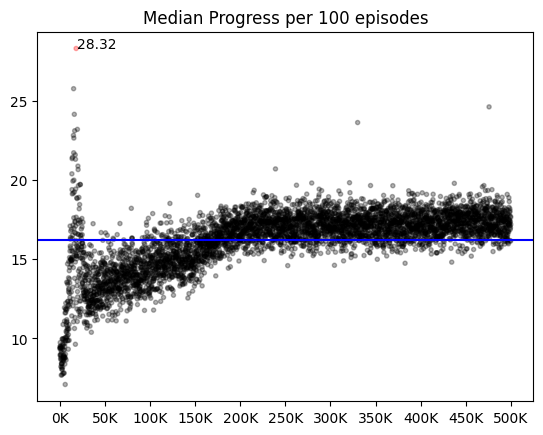

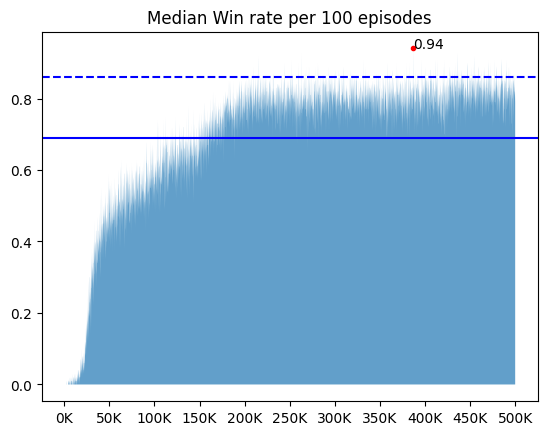

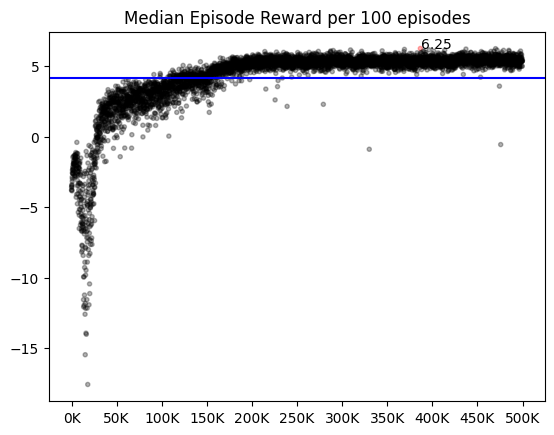

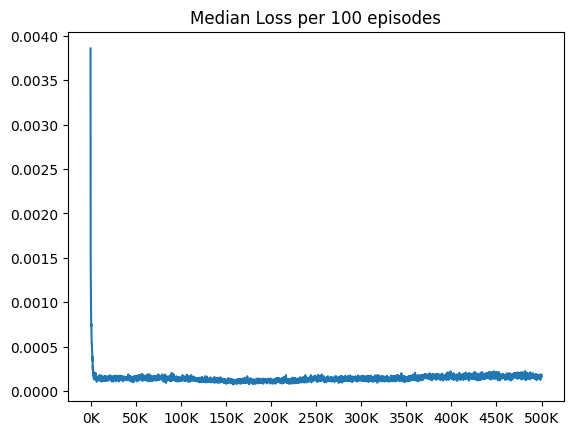

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/3dim'는 이미 존재합니다.
모델이 저장되었습니다.


In [ ]:
trainer.train()
trainer.visualize_train()
trainer.save_model()

# 03 Tester

## def tester env, agent

In [ ]:
tester_env = LimitedMinesweeperEnv(map_size=level['easy']['map_size'],
                                    n_mines=level['easy']['n_mines'],
                                    train=False)

tester_agent = Agent(env=env,
                        net=net,
                        MEM_SIZE=MEM_SIZE,
                        MEM_SIZE_MIN=MEM_SIZE_MIN,
                        BATCH_SIZE=BATCH_SIZE,
                        LEARNING_RATE=LEARNING_RATE,
                        LEARN_DECAY=LEARN_DECAY,
                        # LEARN_MIN=LEARN_MIN,
                        DISCOUNT=DISCOUNT,
                        EPSILON=EPSILON,
                        EPSILON_DECAY=EPSILON_DECAY,
                        EPSILON_MIN=EPSILON_MIN,
                        UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## def tester

### fixed

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_valid'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_train'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['final_model'])

In [ ]:
tester = PerformTester(tester_agent, tester_env, tester_env.n_boards, trainer.save_point['best_model_successed'])

### random

In [32]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_valid'])

AttributeError: 'Trainer' object has no attribute 'save_point'

In [33]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_train'])

AttributeError: 'Trainer' object has no attribute 'save_point'

In [ ]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['final_model'])

In [ ]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_successed'])

### random

In [34]:
tester = PerformTester(tester_agent, env, 1000, nns['best_model_valid'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 6.10, Win rate : 0.844


In [35]:
tester = PerformTester(tester_agent, env, 1000, nns['best_model_train'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.816


In [36]:
tester = PerformTester(tester_agent, env, 1000, nns['final_model'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.851


In [37]:
tester = PerformTester(tester_agent, env, 1000, nns['best_model_successed'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 5.80, Win rate : 0.826


### random

In [ ]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_valid'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 6.10, Win rate : 0.841


In [ ]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_train'])

Test Started.
Test [n: 1000], Median progress: 17.00, Median reward: 5.80, Win rate : 0.84


In [ ]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['final_model'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 6.10, Win rate : 0.851


In [ ]:
tester = PerformTester(tester_agent, env, 1000, trainer.save_point['best_model_successed'])

Test Started.
Test [n: 1000], Median progress: 18.00, Median reward: 6.10, Win rate : 0.845


## 진 케이스 시각화

In [ ]:
target_done = tester.lost_game_done
idx_iteration = iter(range(len(target_done)))

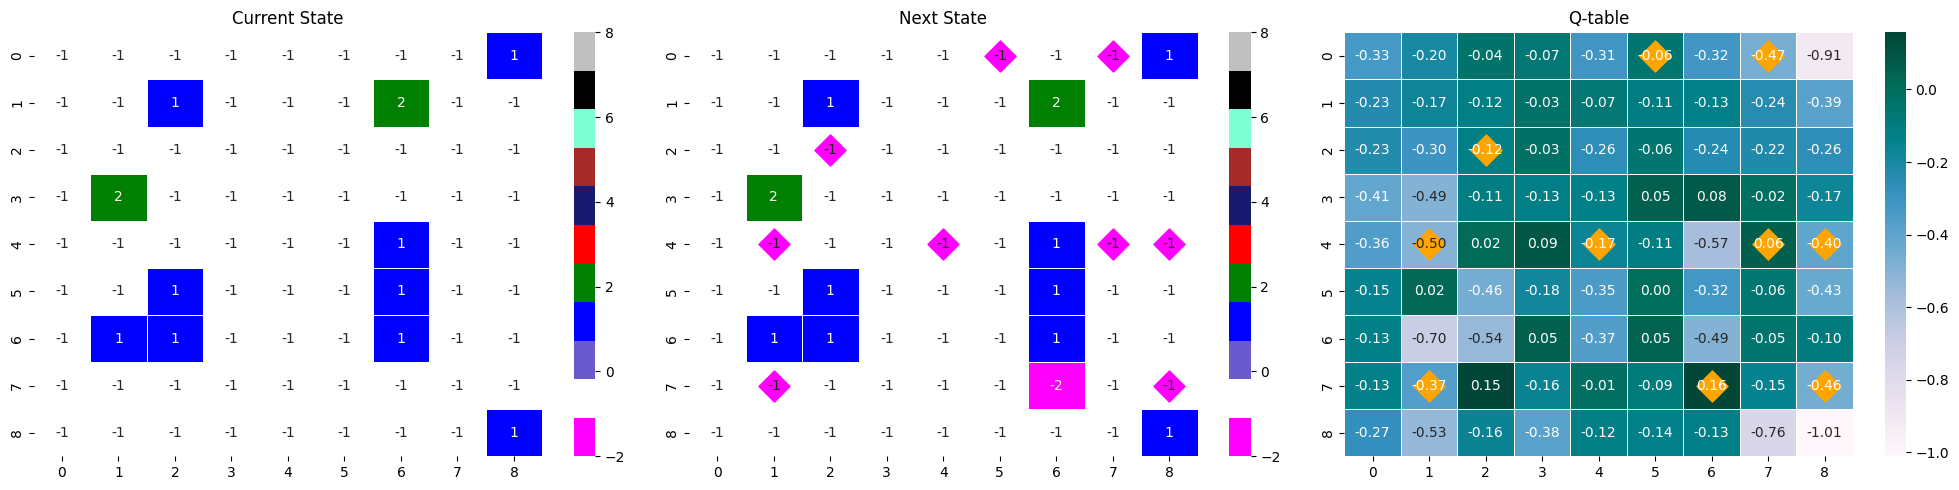

In [ ]:
idx = next(idx_iteration)
tester.visualize_single_step(target_done.iloc[idx], min_max_scaling=False)

In [ ]:
target_iter = tester.lost_game_per_epi

In [ ]:
epi, epi_df = next(target_iter)

tester.replay_single_episode(epi_df)

coord (8, 8) is clicked.


 
coord (0, 8) is clicked.


 
coord (3, 1) is clicked.


 
coord (5, 2) is clicked.


 
coord (6, 6) is clicked.


 
coord (4, 6) is clicked.


 
coord (6, 1) is clicked.


 
coord (6, 2) is clicked.


 
coord (5, 6) is clicked.


 
coord (1, 6) is clicked.


 
coord (1, 2) is clicked.


 
coord (7, 6) is clicked.


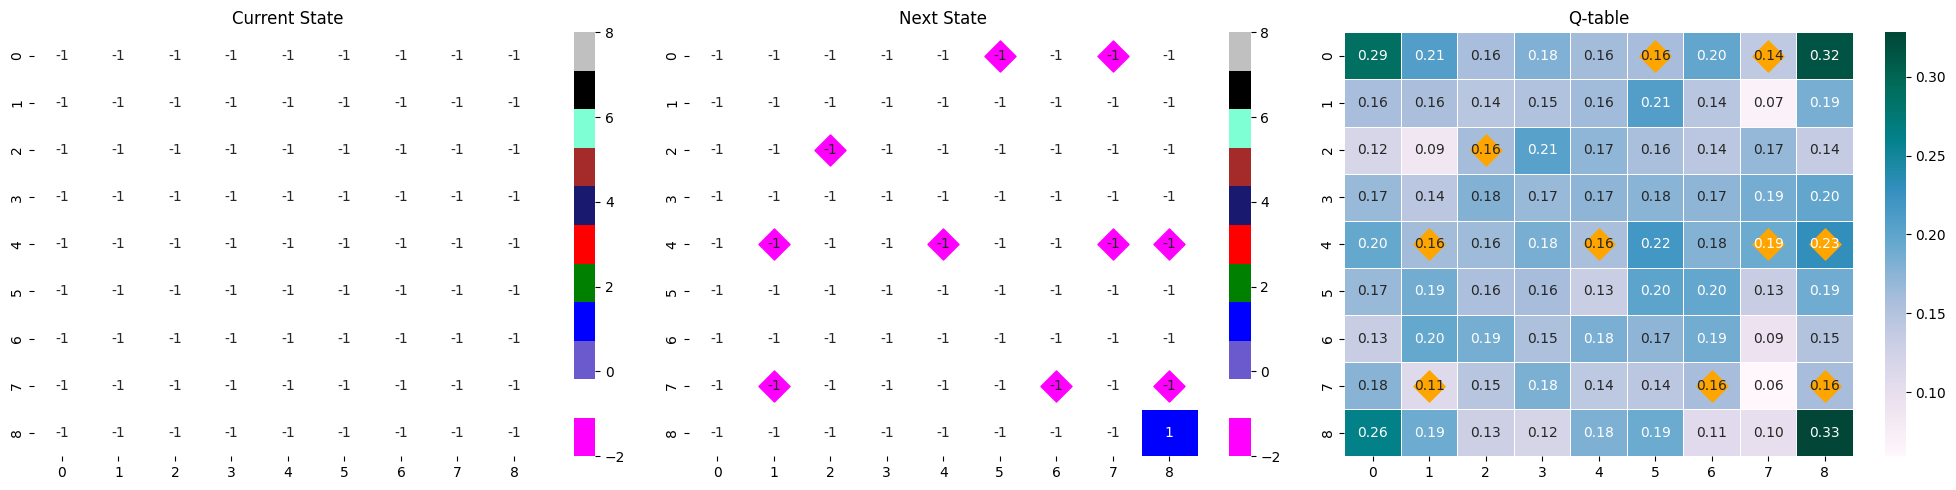

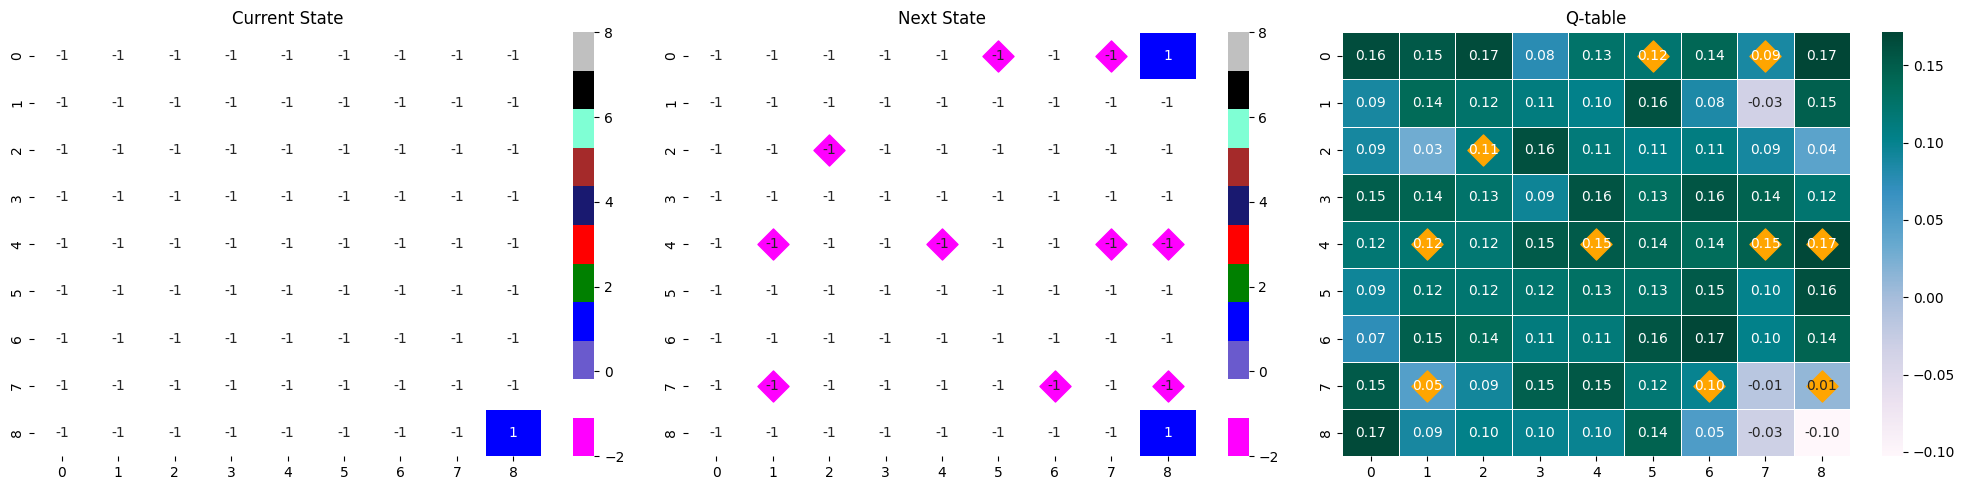

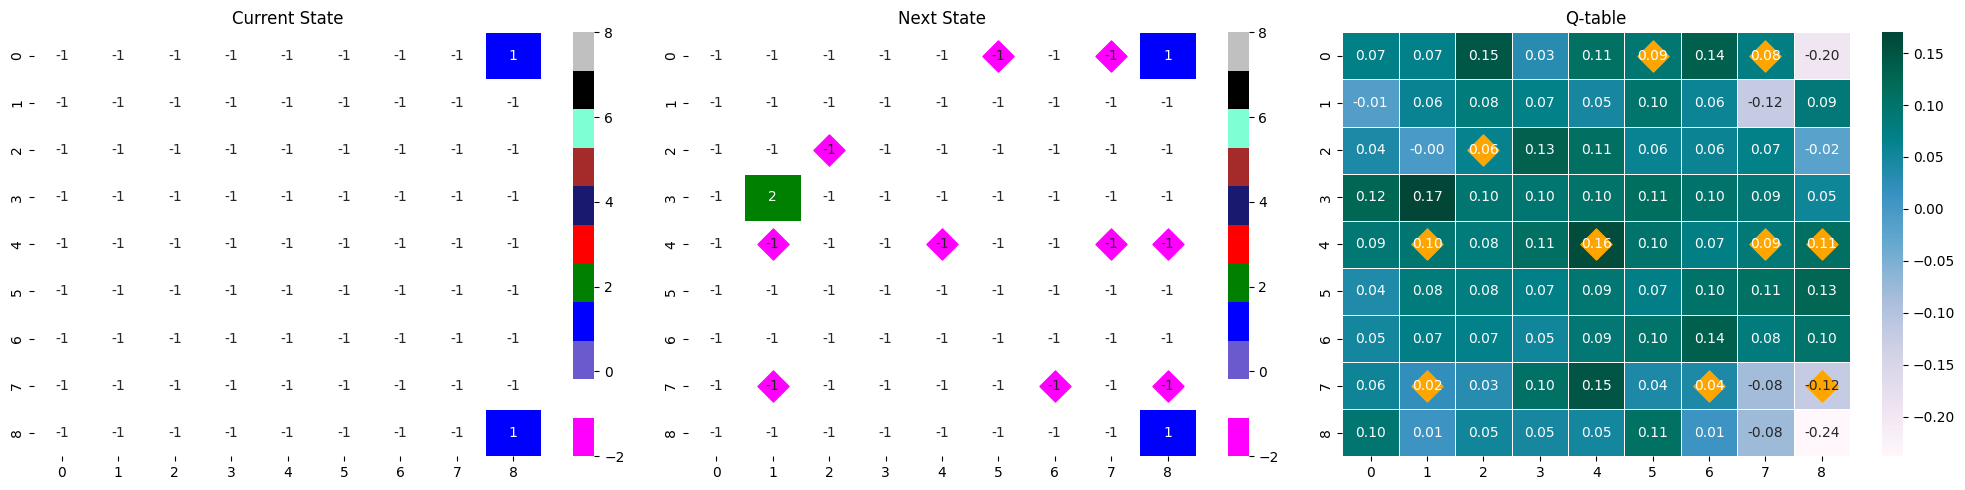

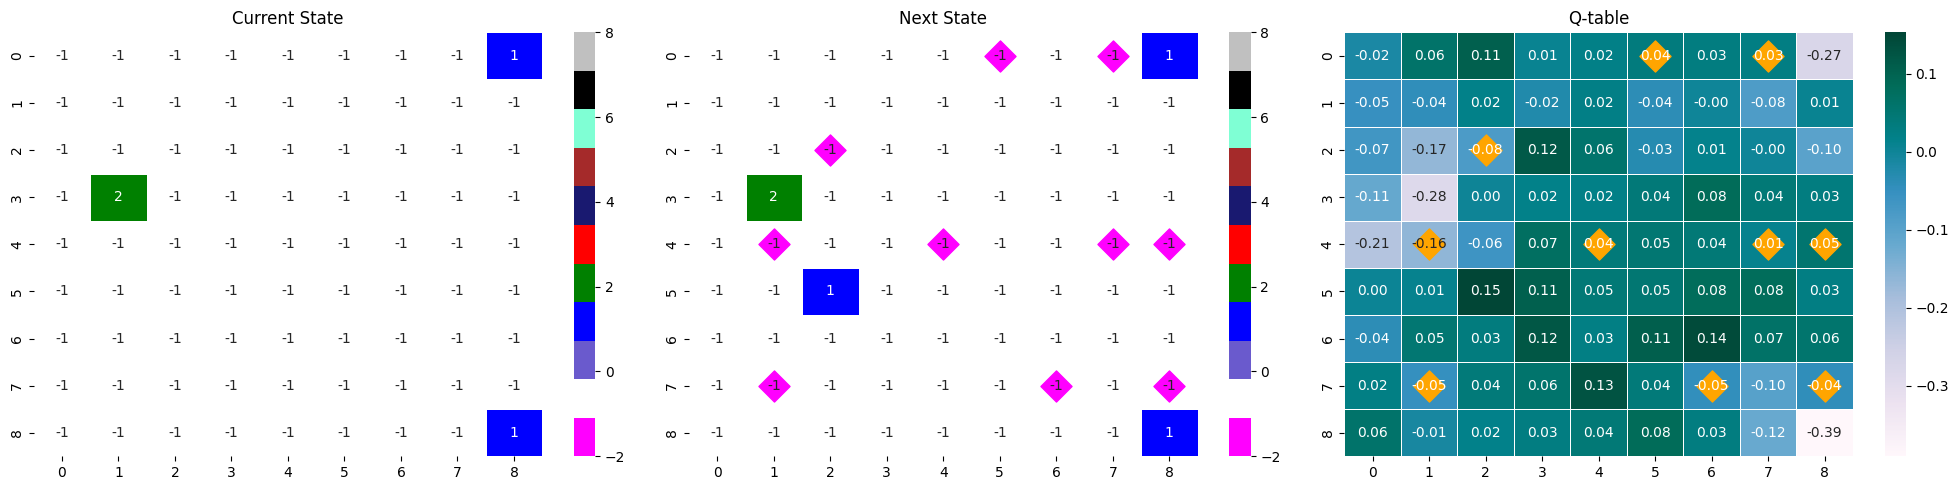

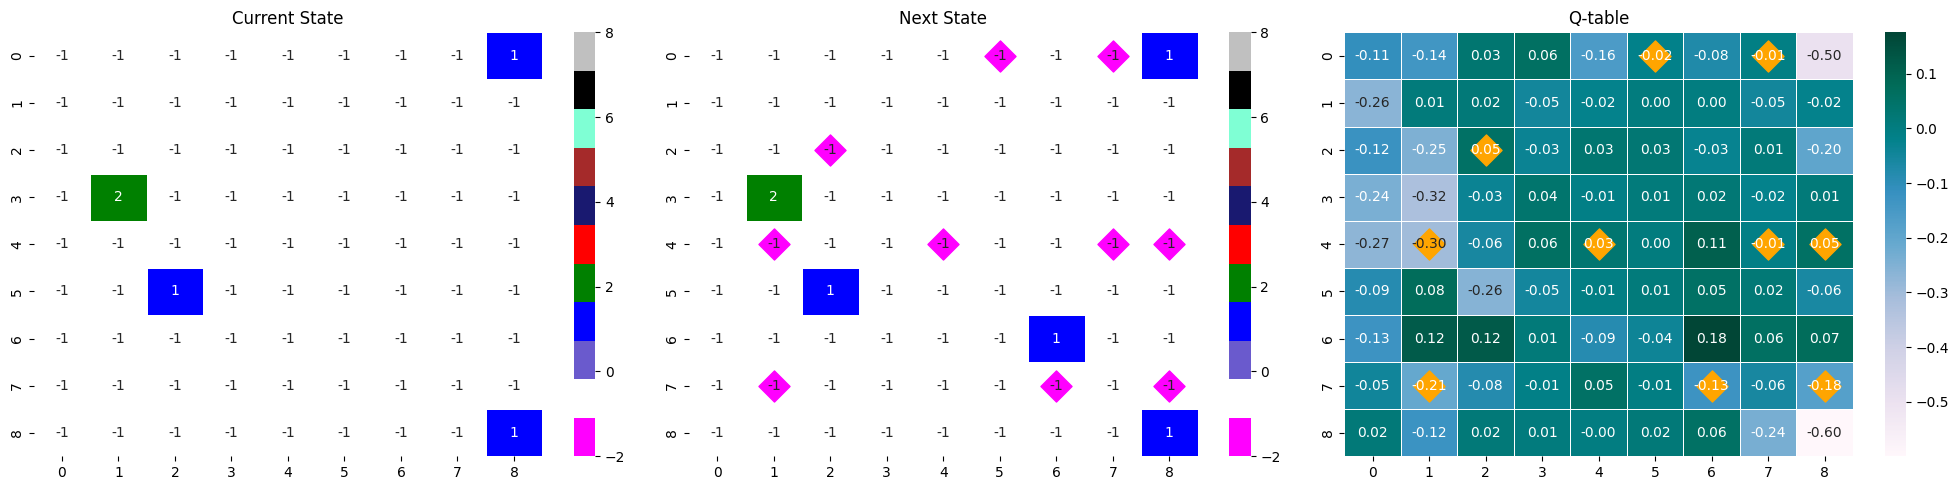

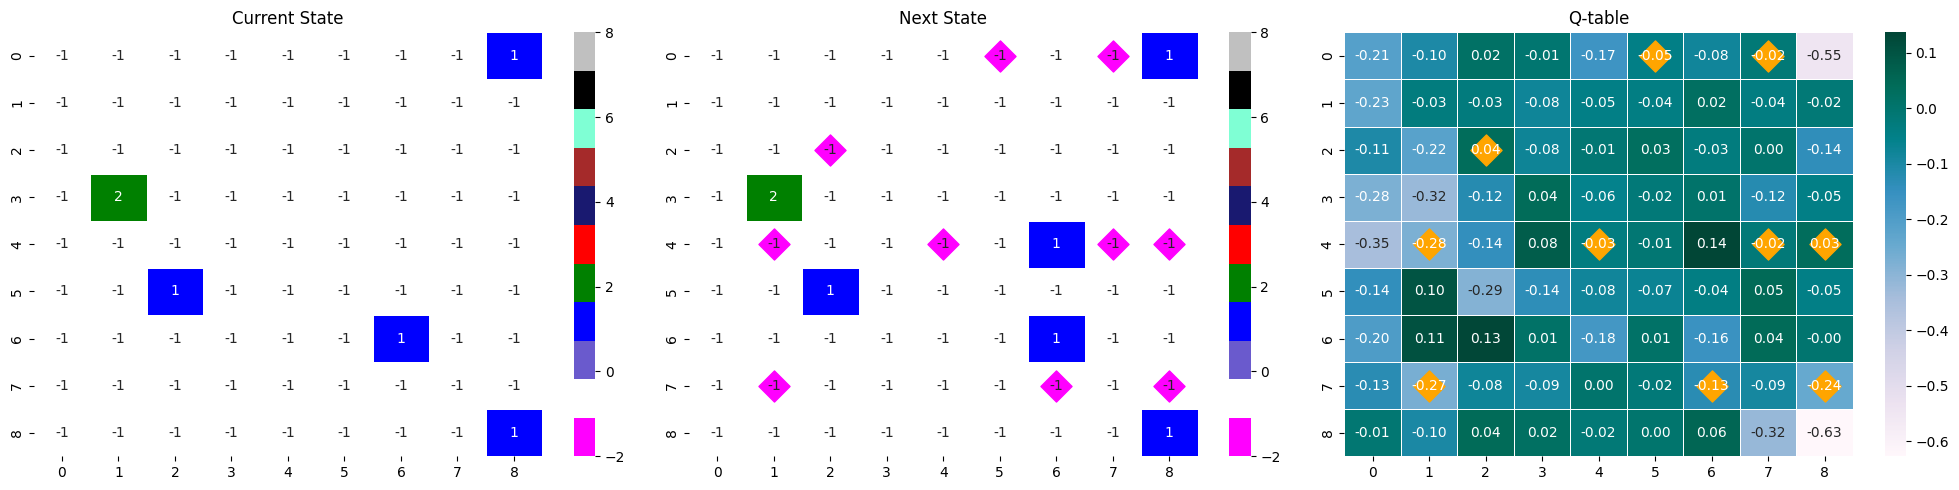

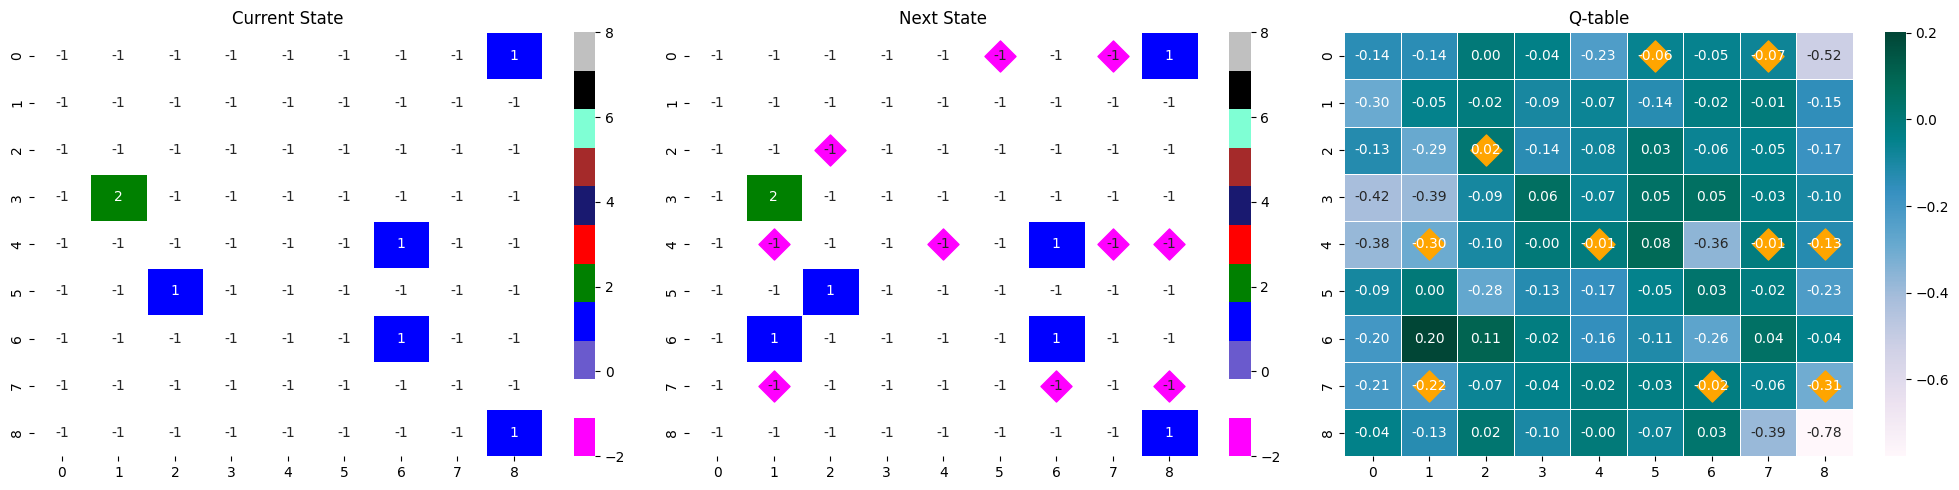

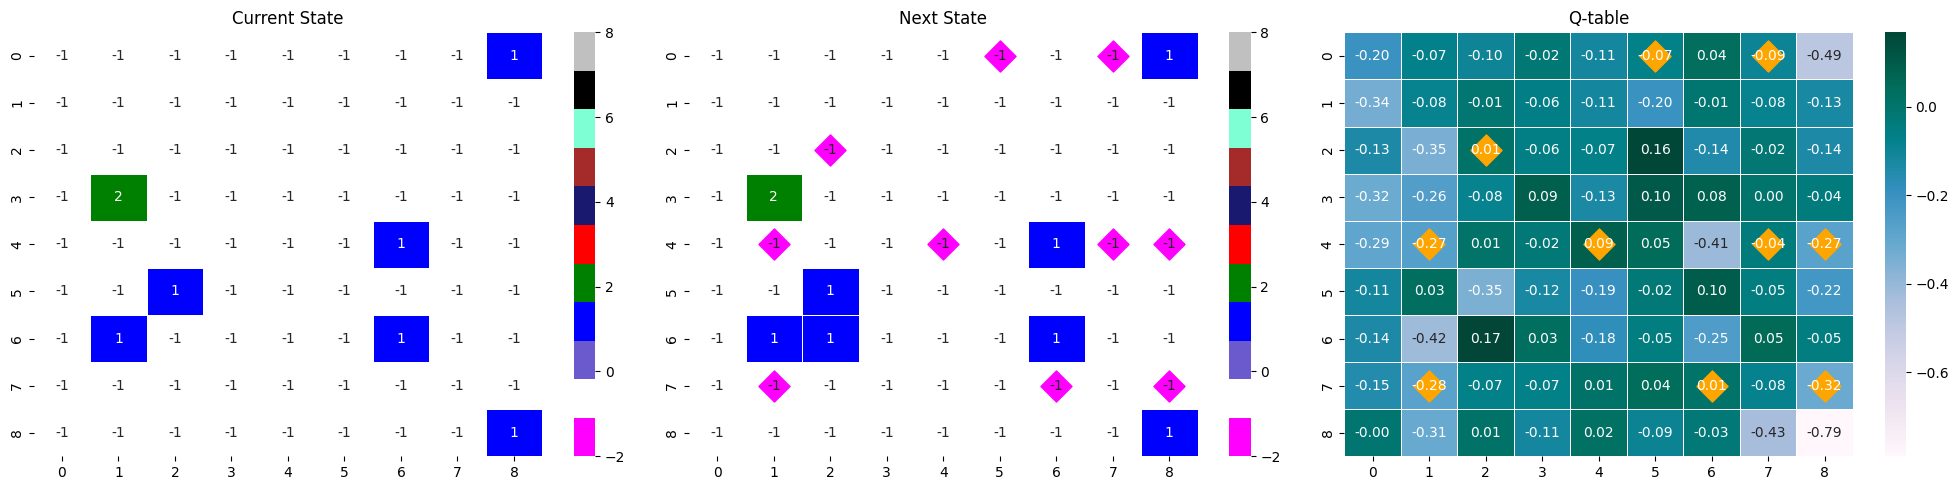

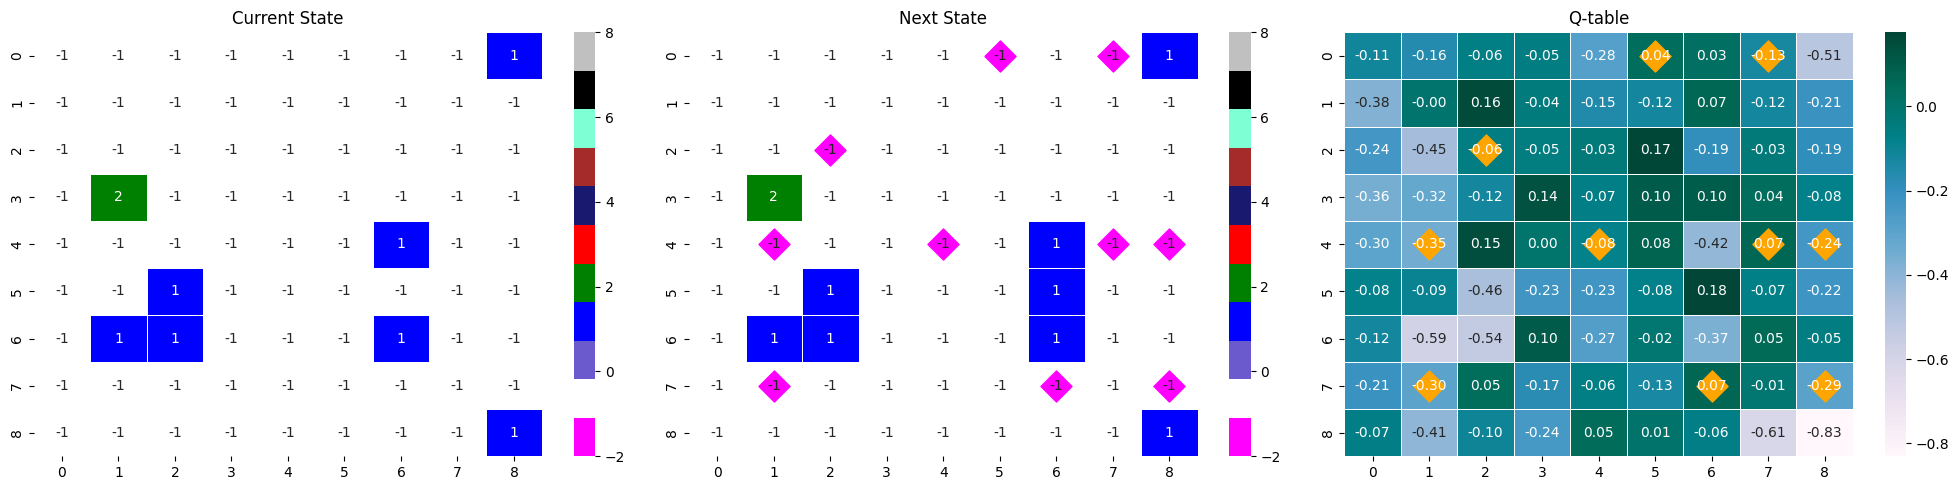

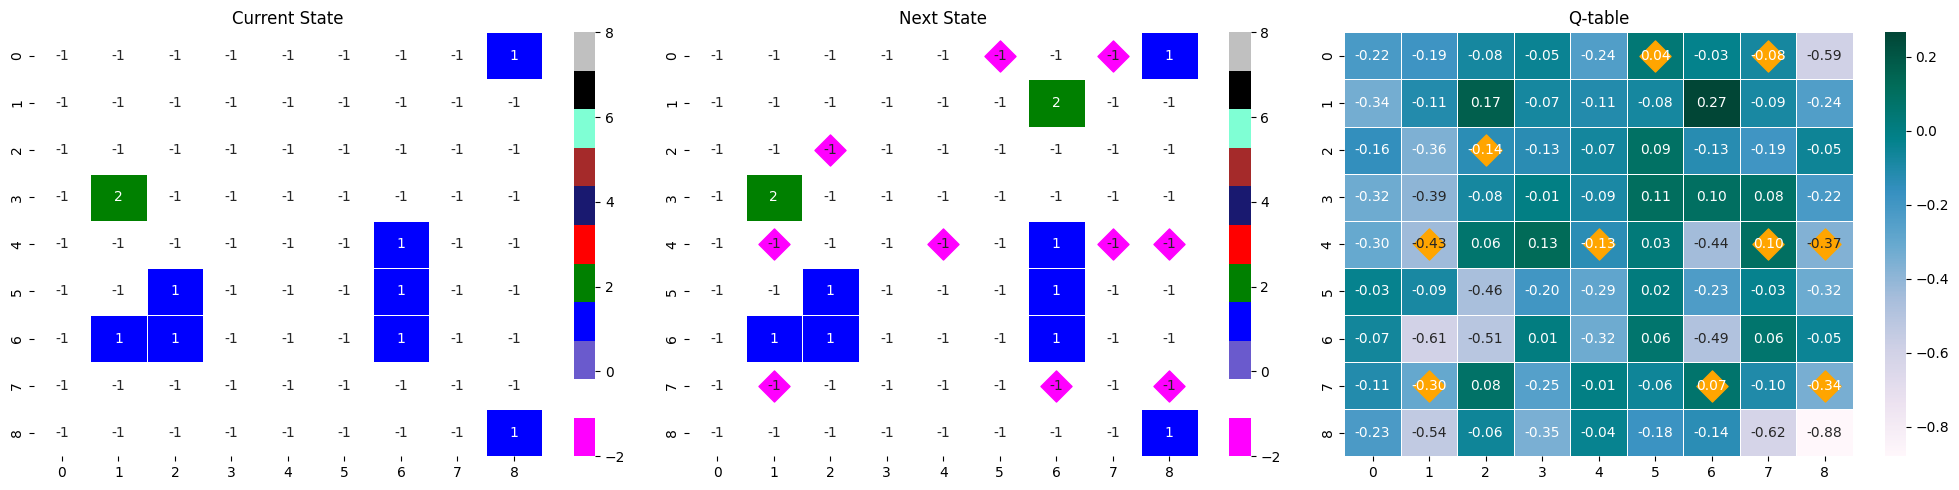

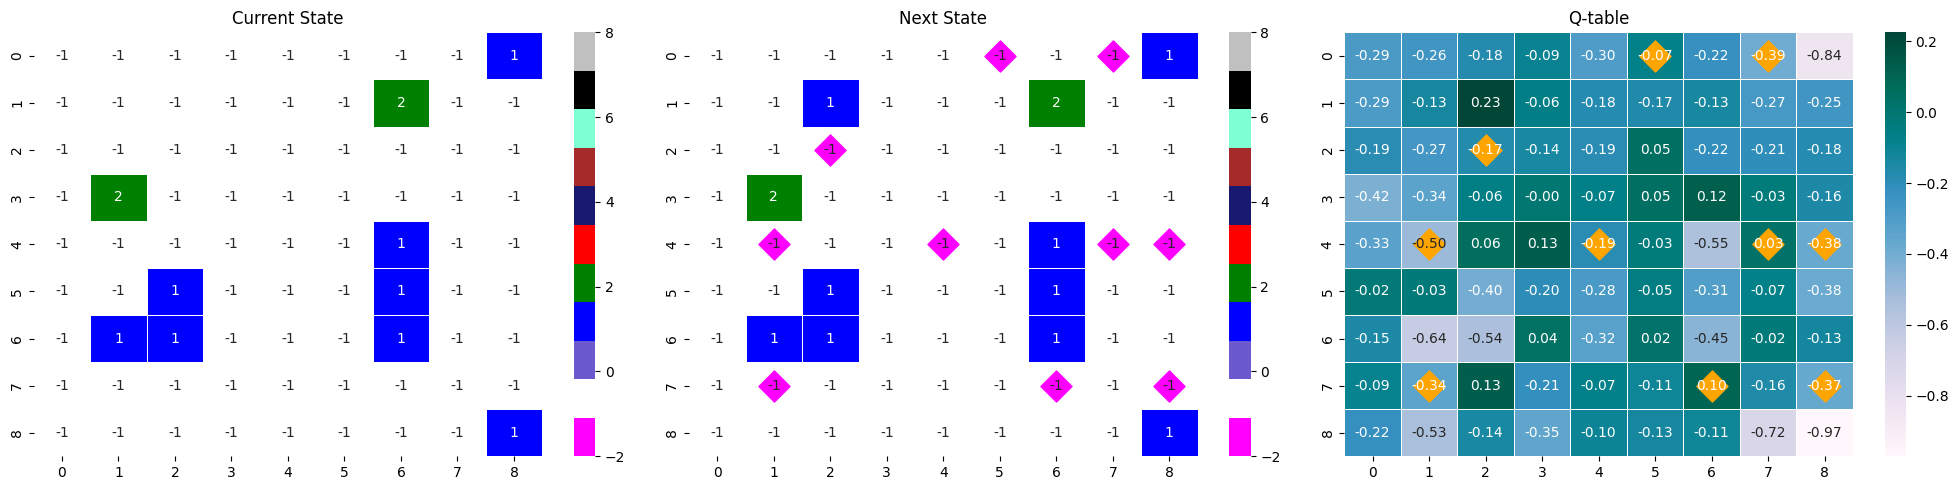

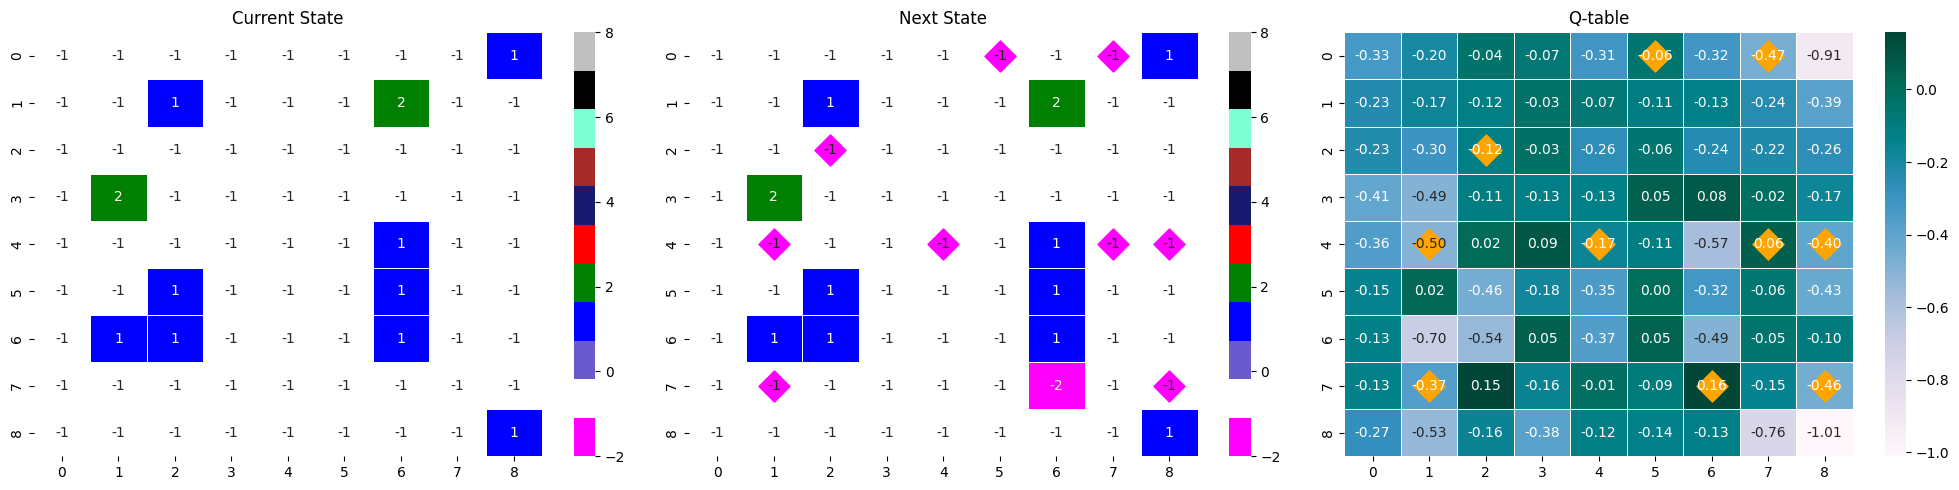

In [ ]:
for idx in range(len(epi_df)):
    tester.visualize_single_step(epi_df.iloc[idx], min_max_scaling=False)

## 승리한 케이스 시각화

In [ ]:
target_done = tester.won_game_done
idx_iteration = iter(range(len(target_done)))

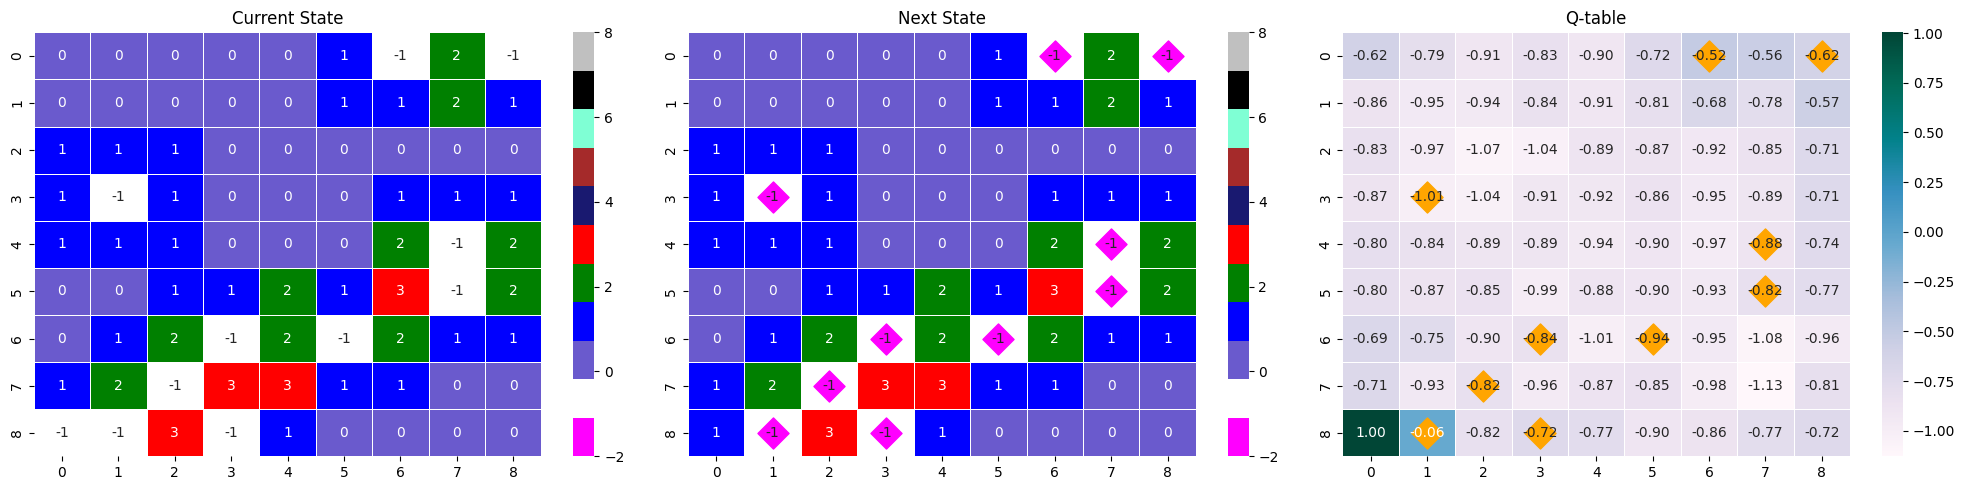

In [ ]:
idx = next(idx_iteration)
tester.visualize_single_step(target_done.iloc[idx], min_max_scaling=False)

In [ ]:
target_iter = tester.won_game_per_epi

In [ ]:
epi, epi_df = next(target_iter)
tester.replay_single_episode(epi_df)

coord (8, 8) is clicked.


 
coord (5, 6) is clicked.


 
coord (6, 4) is clicked.


 
coord (5, 3) is clicked.


 
coord (5, 4) is clicked.


 
coord (5, 5) is clicked.


 
coord (5, 8) is clicked.


 
coord (4, 4) is clicked.


 
coord (5, 1) is clicked.


 
coord (8, 2) is clicked.


 
coord (7, 3) is clicked.


 
coord (3, 0) is clicked.


 
coord (4, 8) is clicked.


 
coord (0, 7) is clicked.


 
coord (8, 0) is clicked.


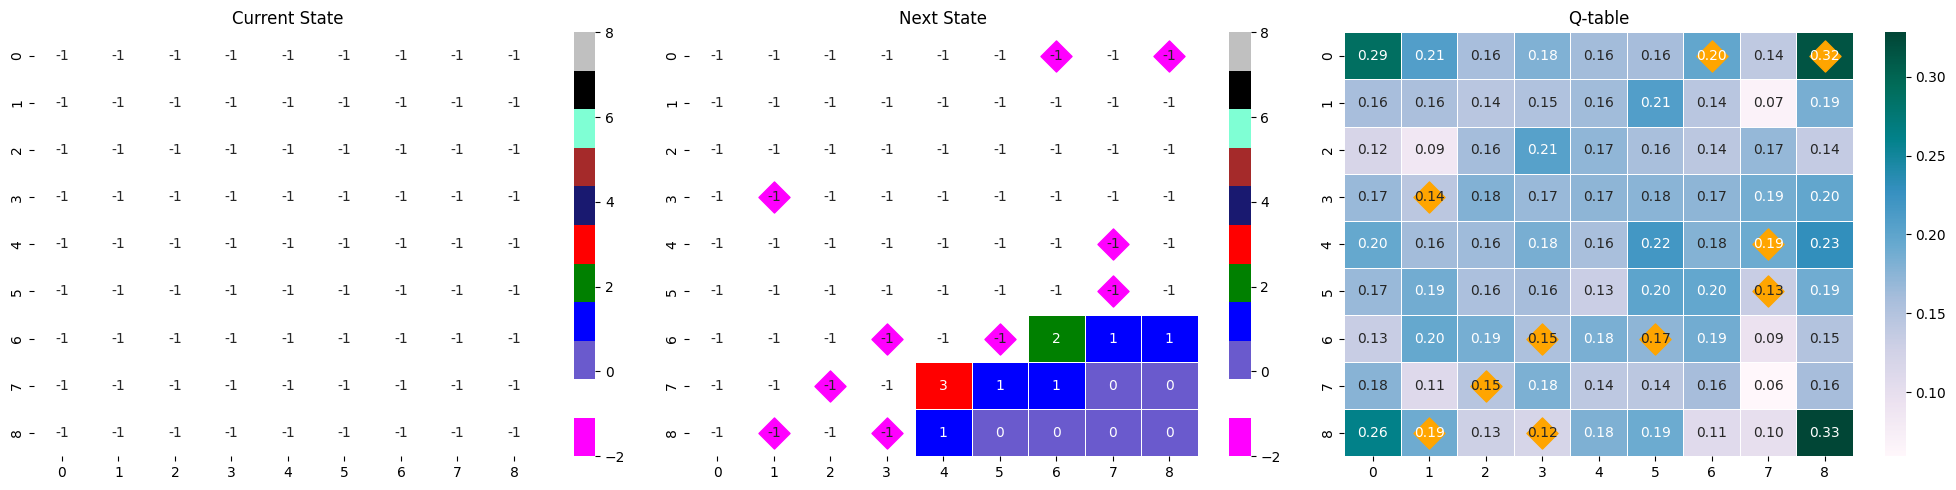

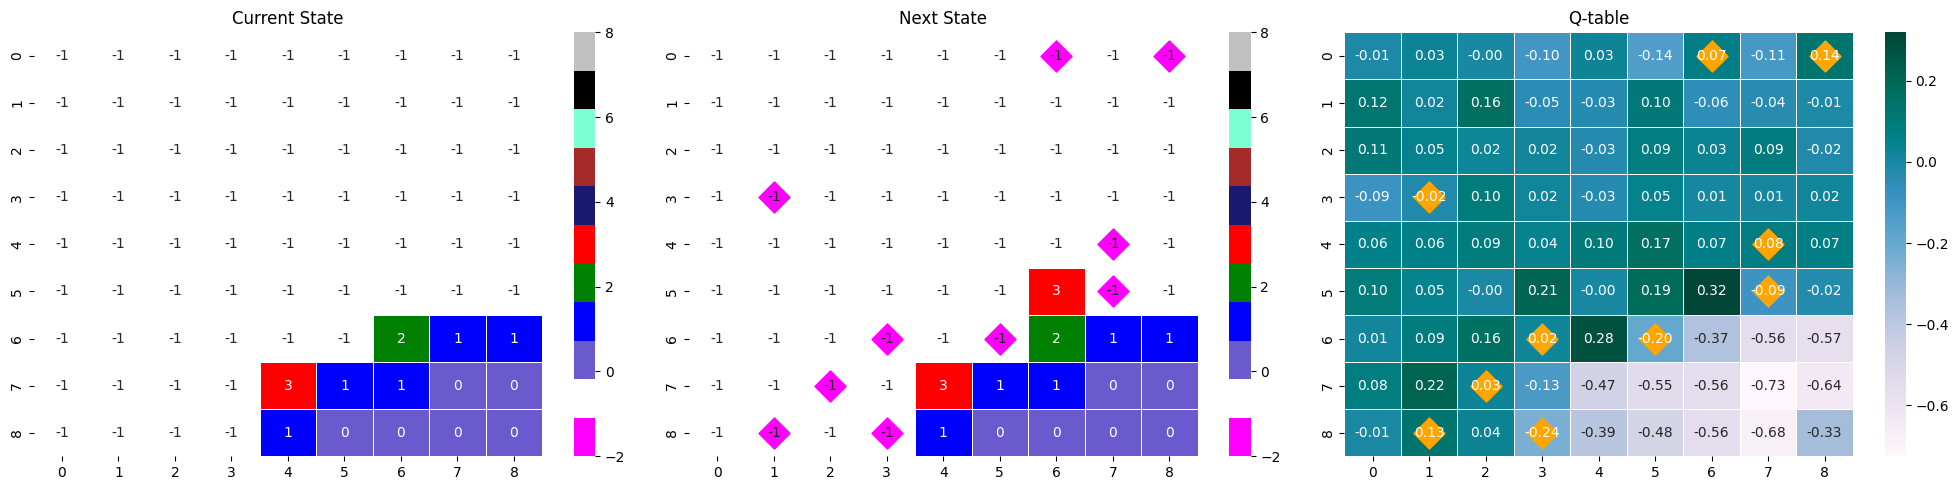

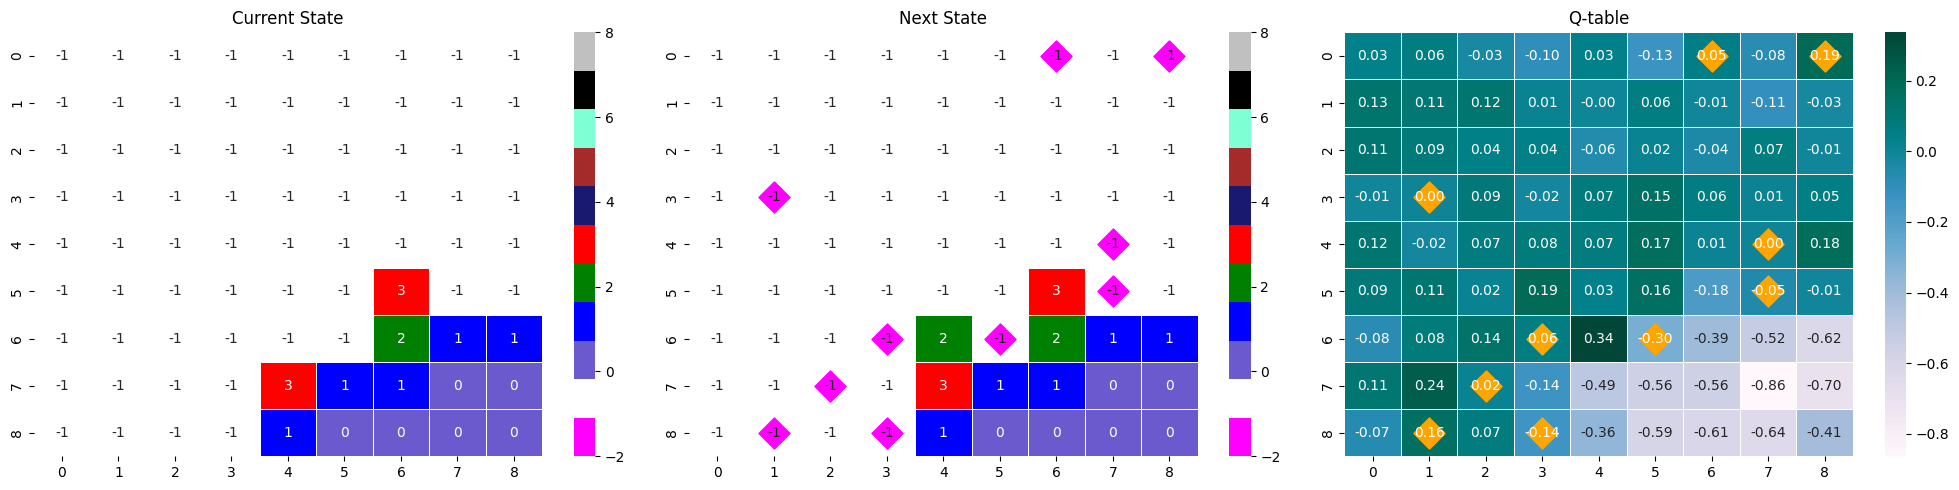

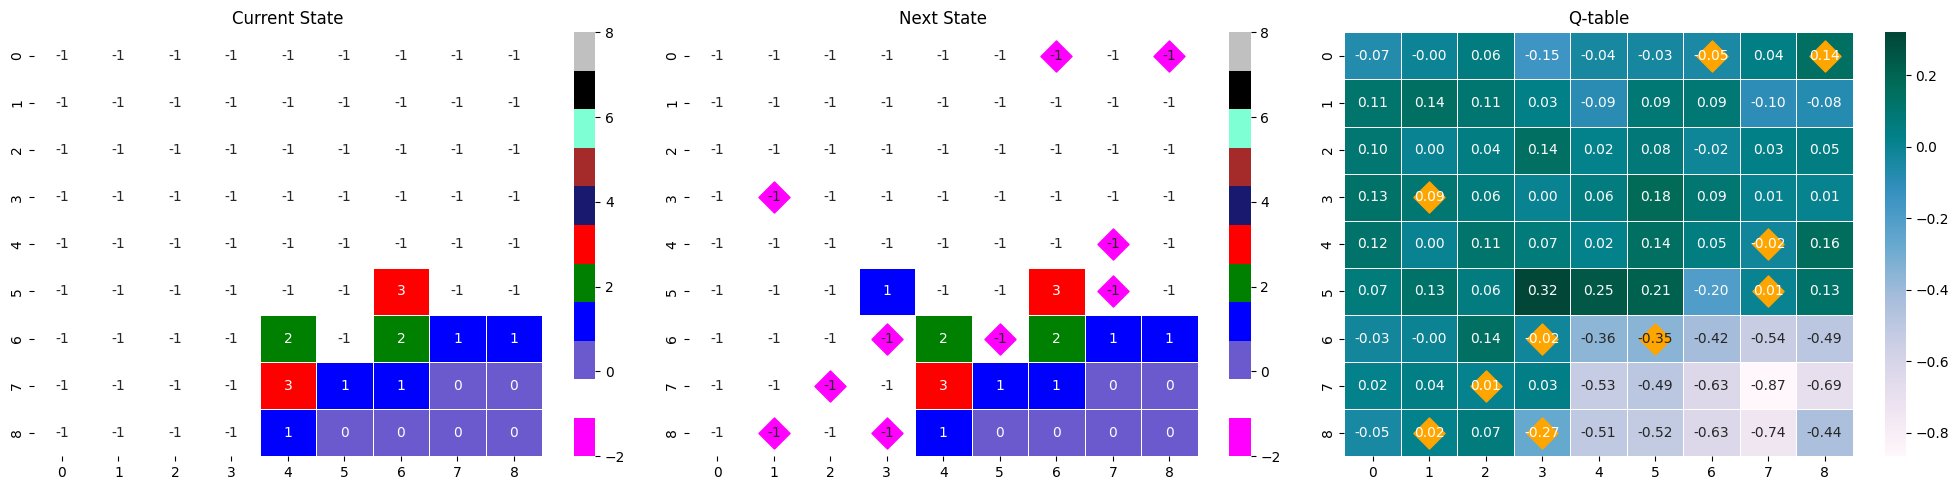

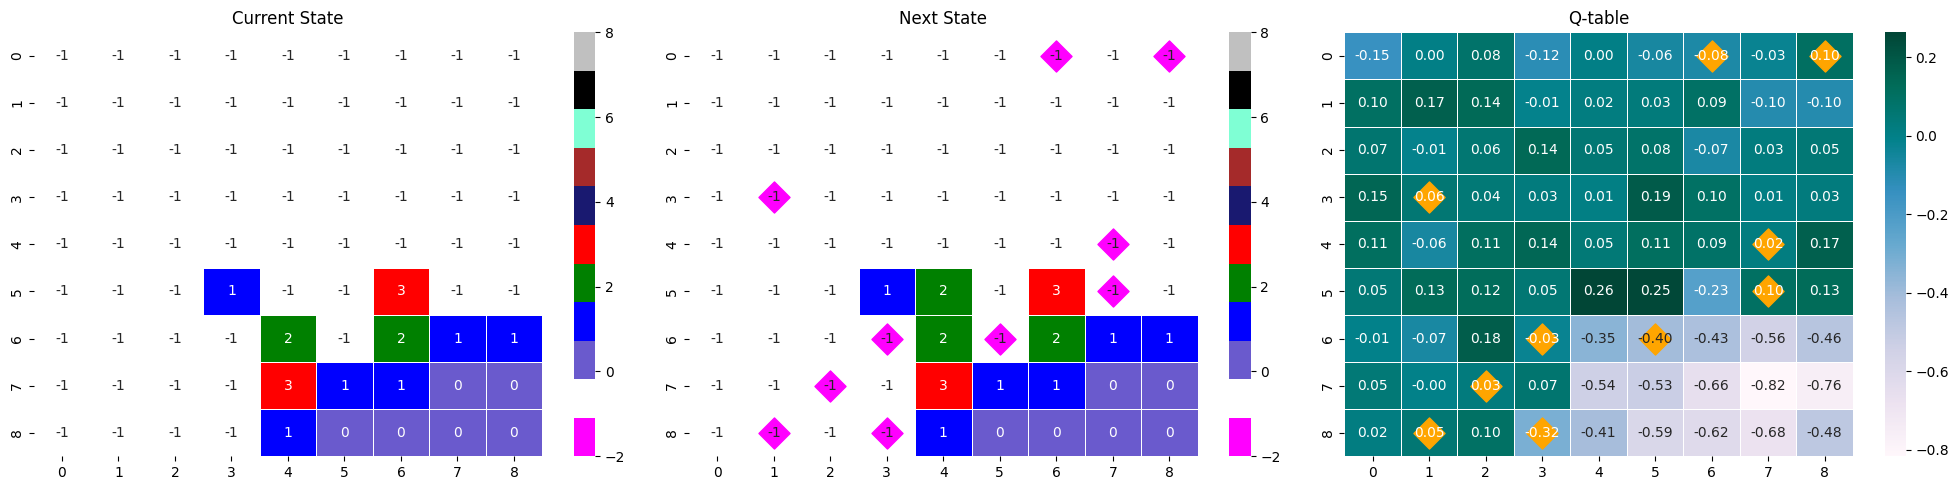

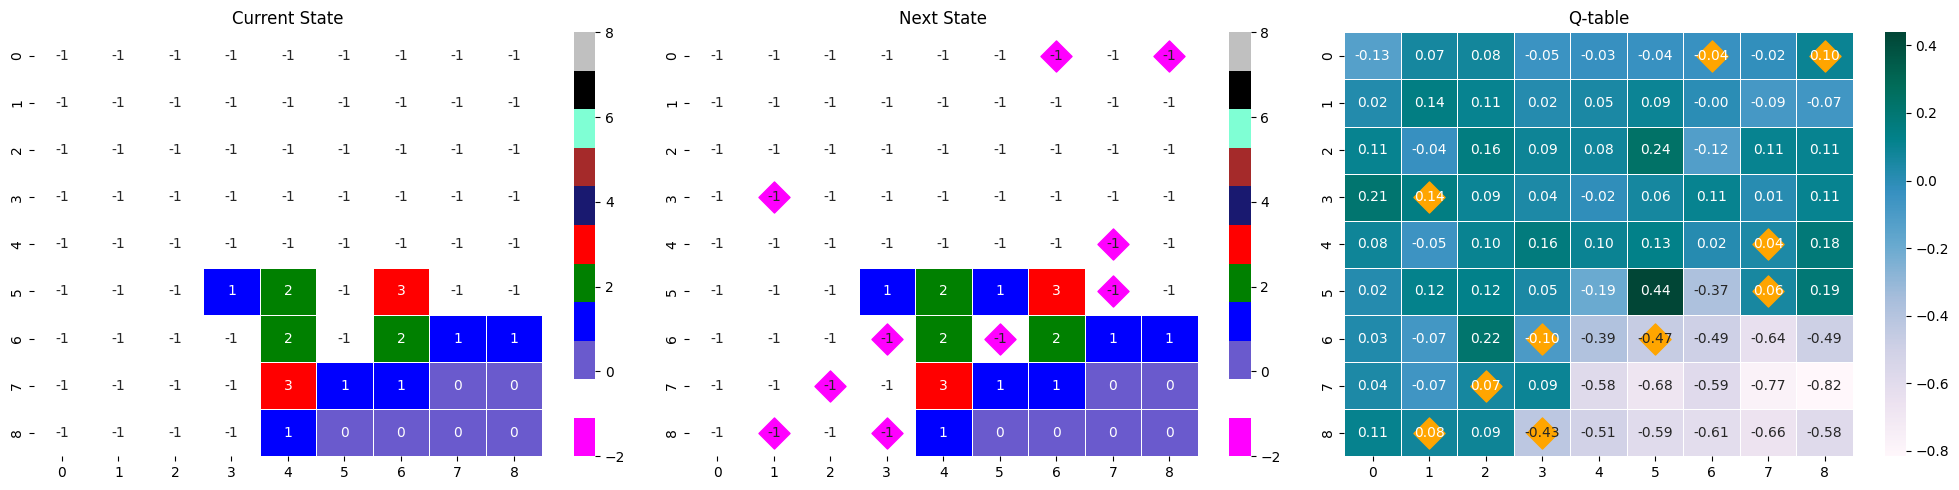

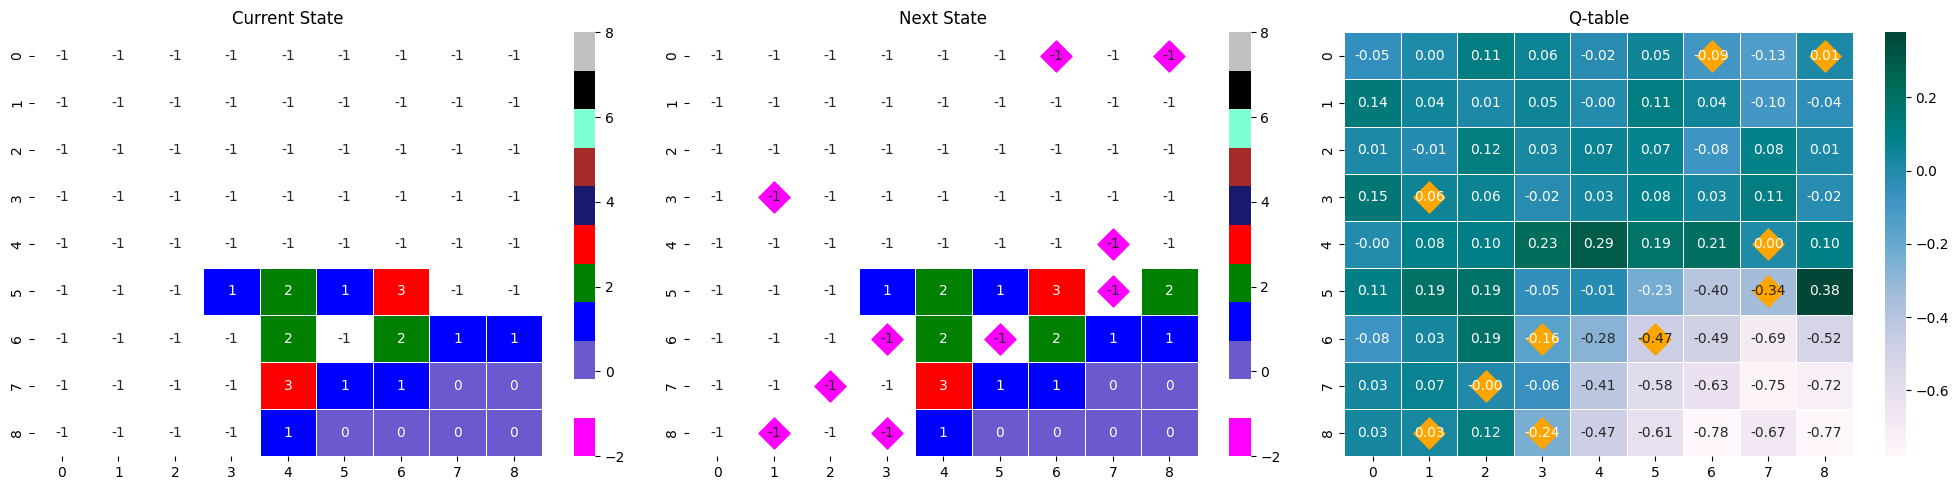

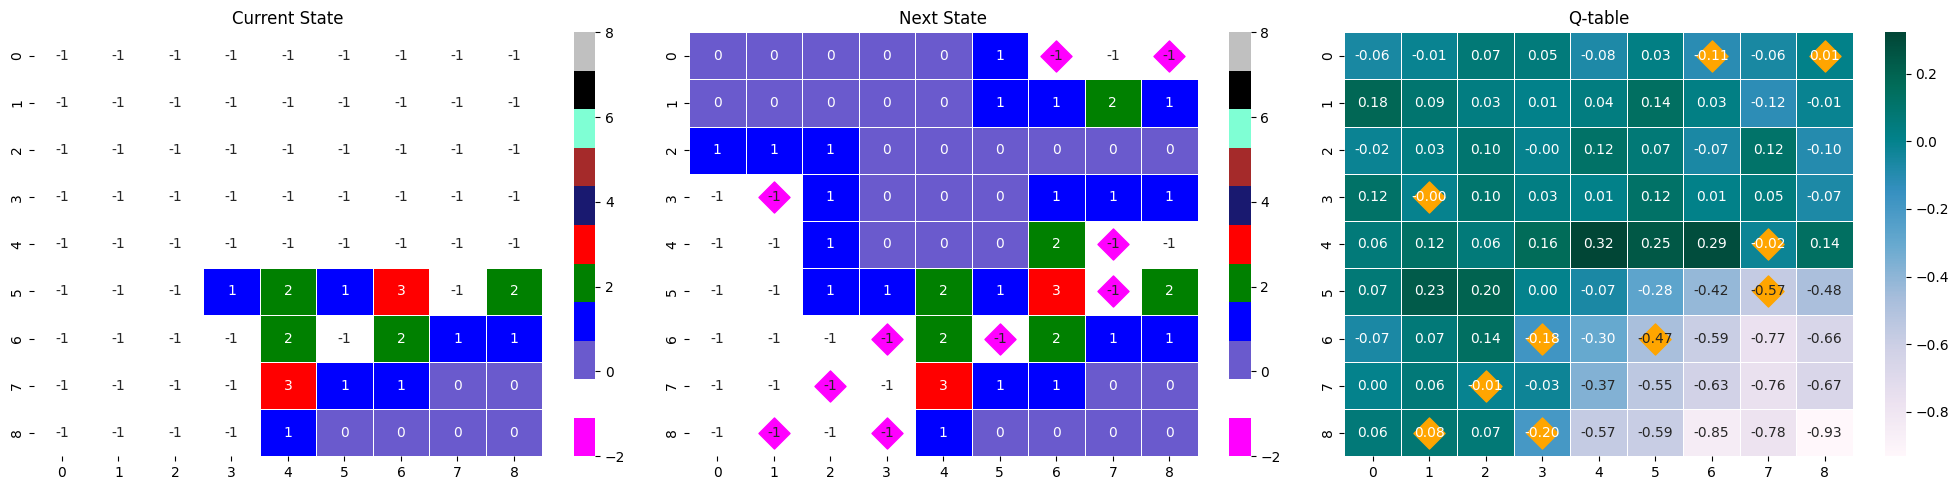

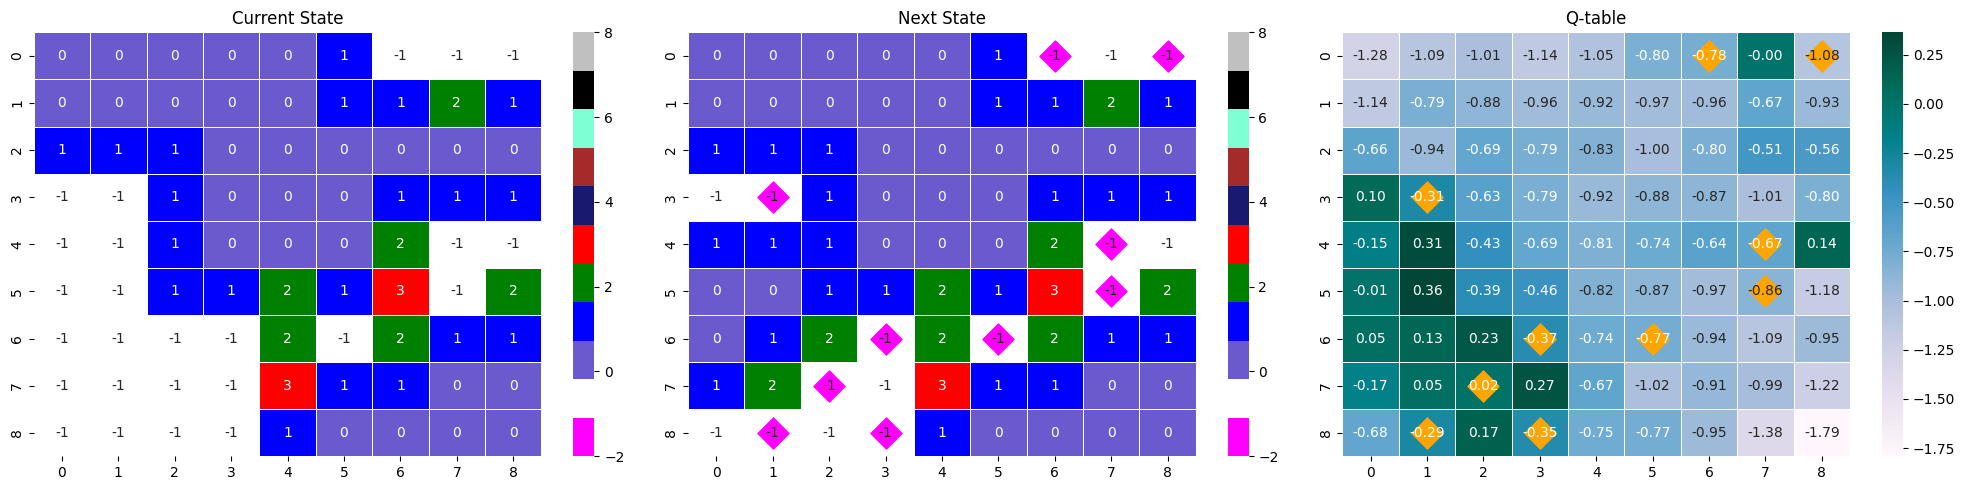

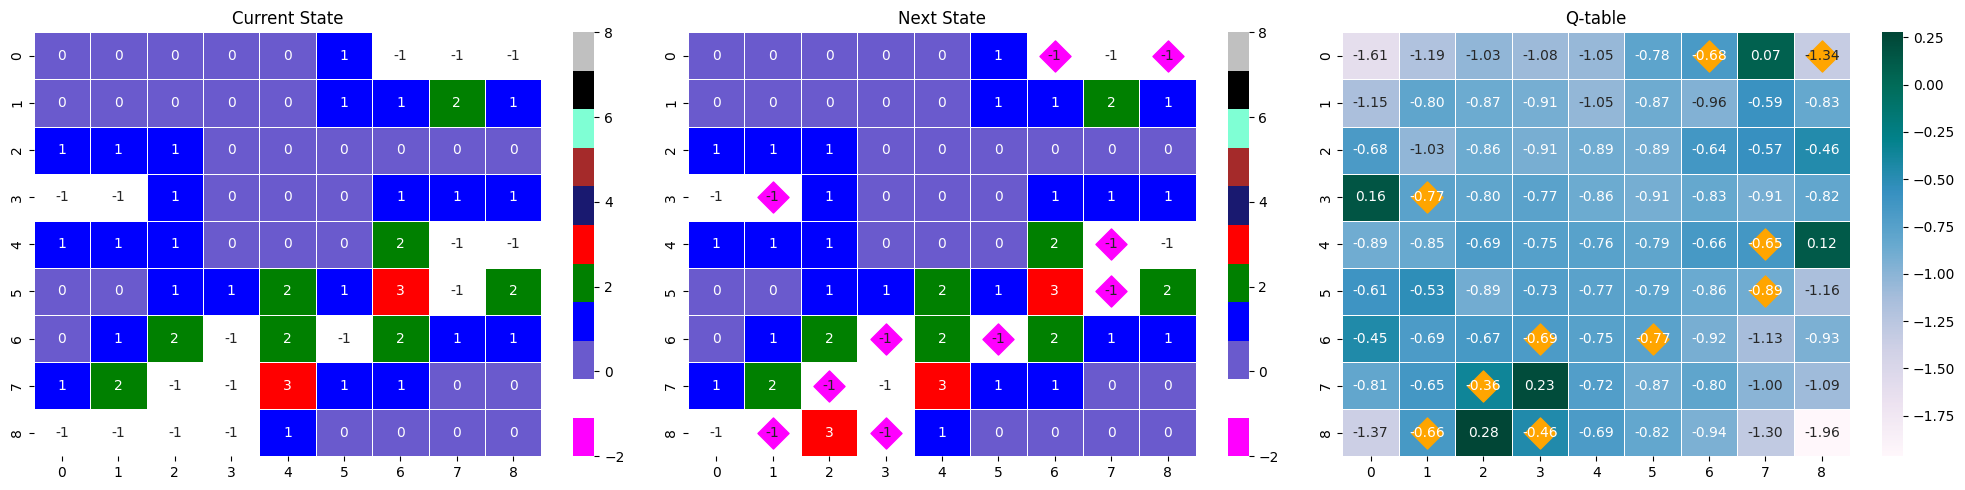

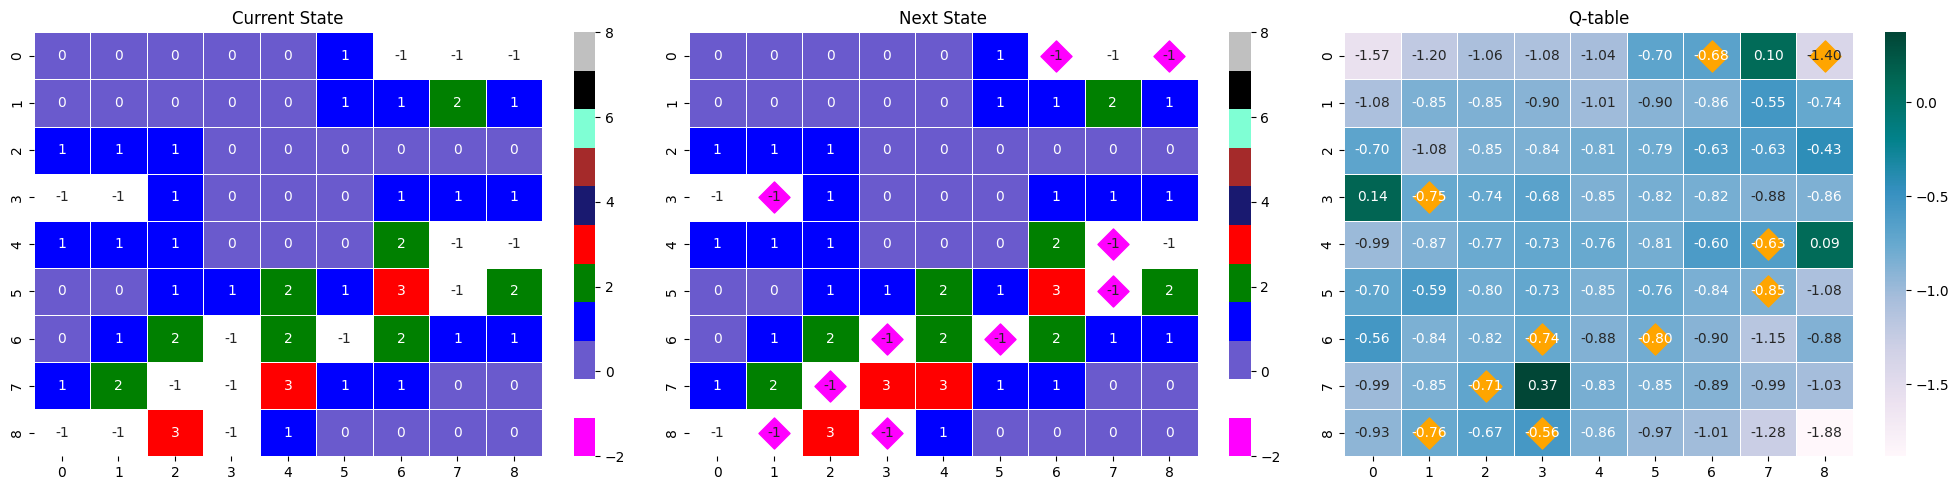

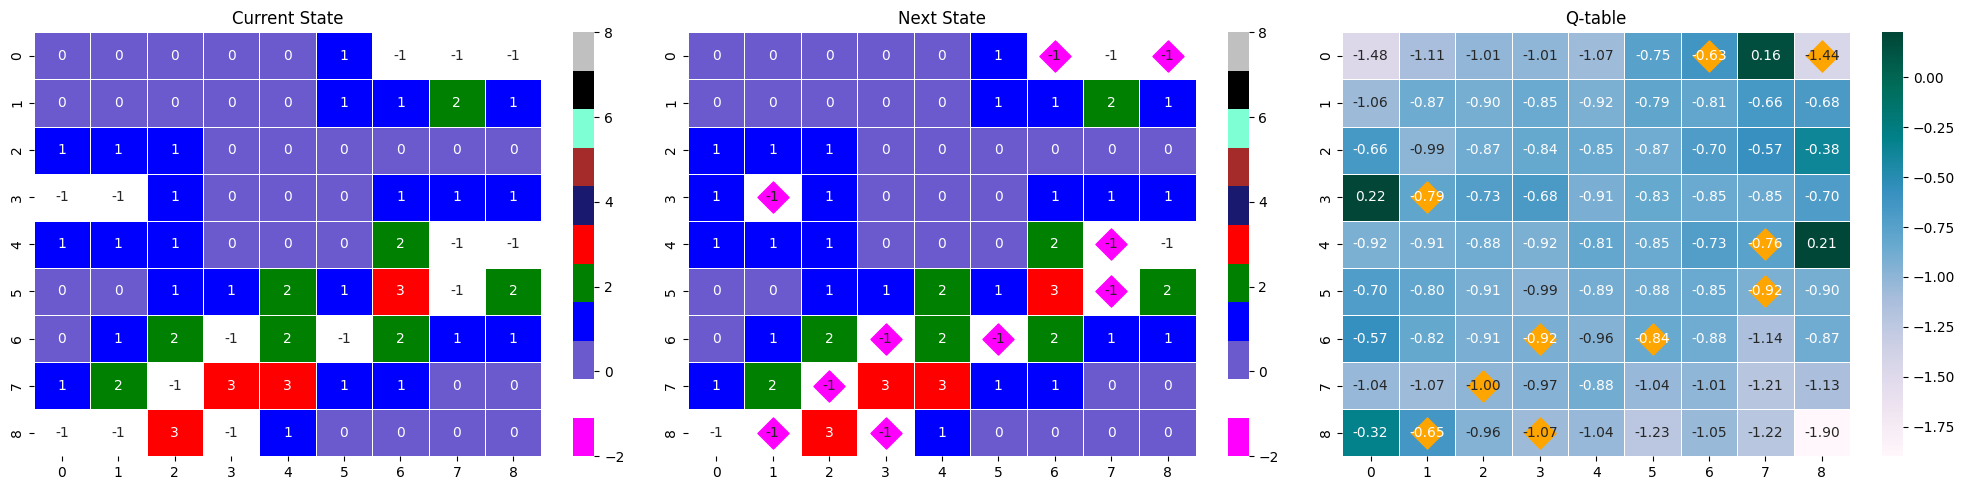

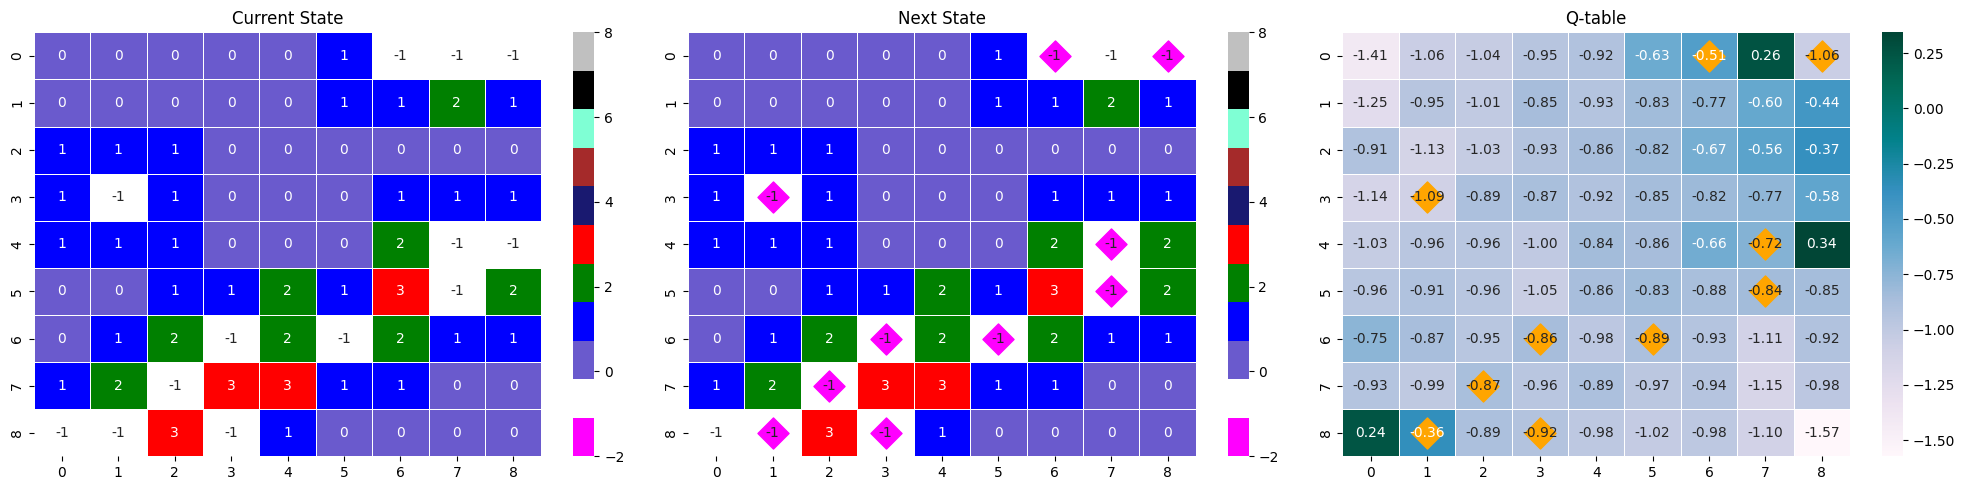

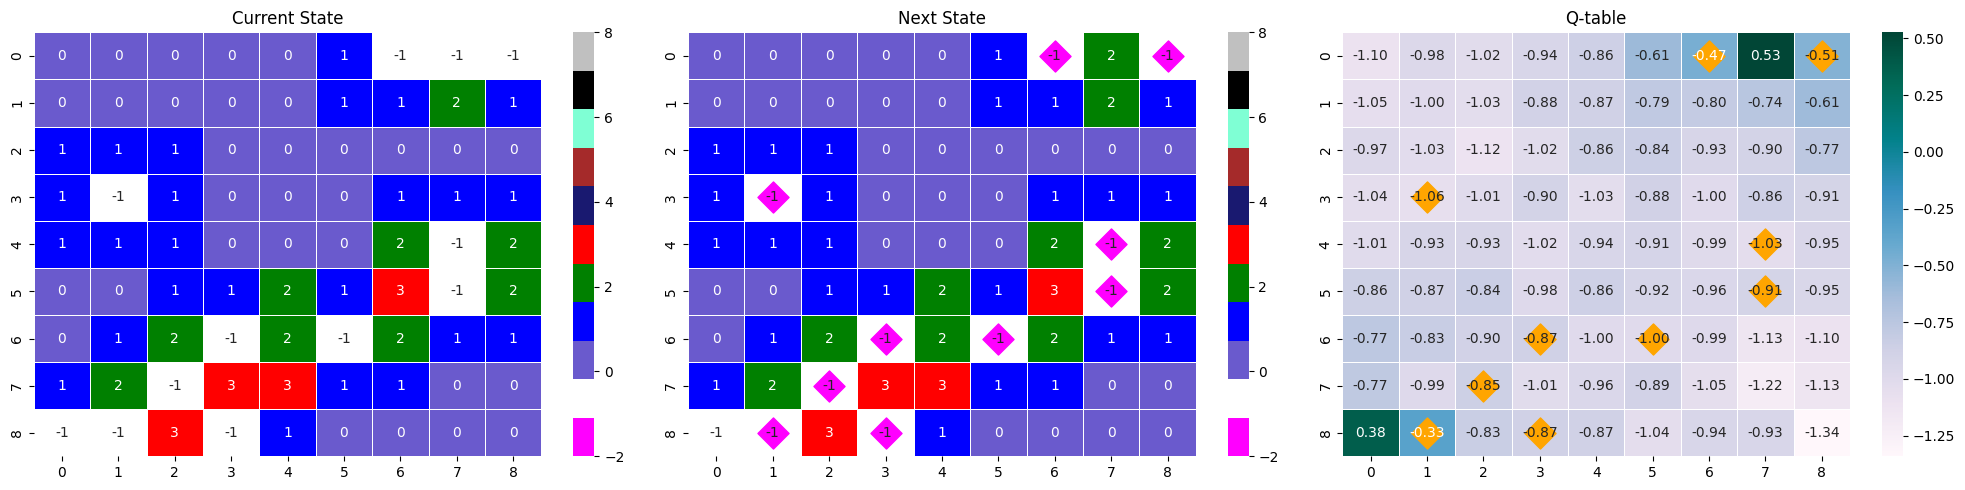

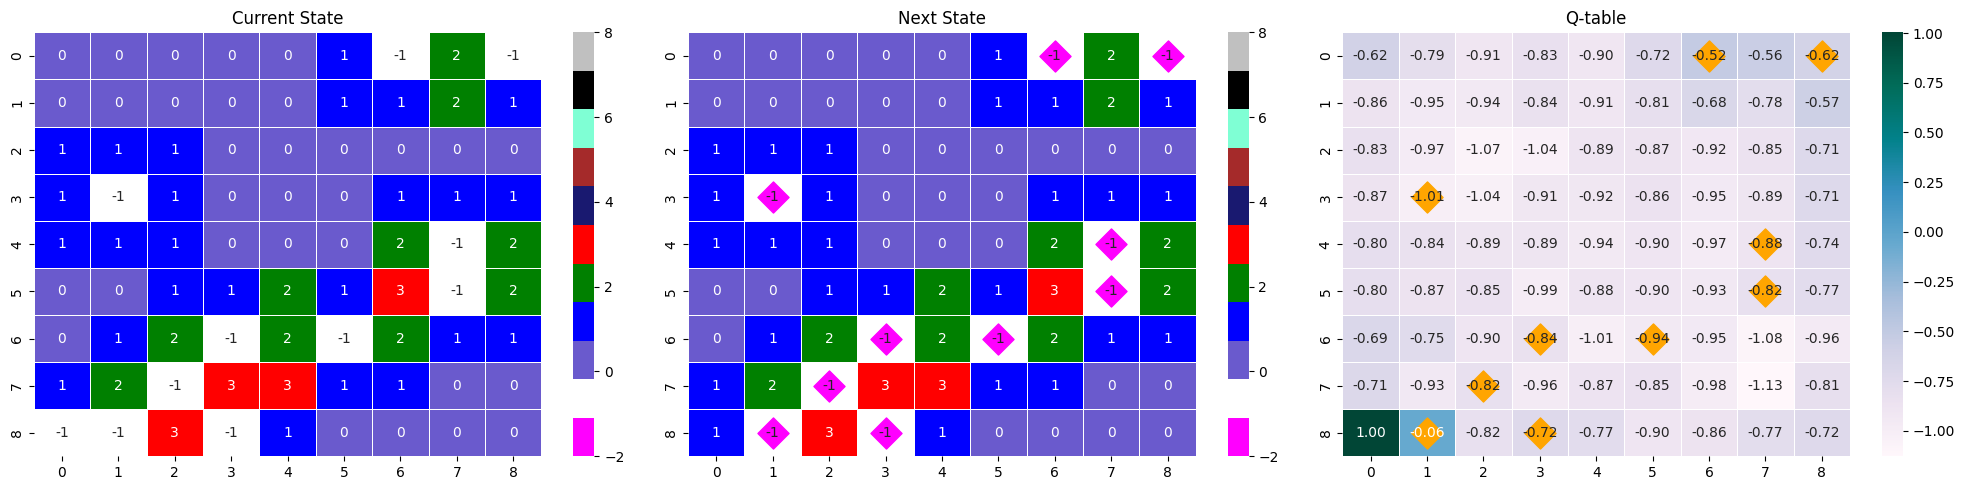

In [ ]:
for idx in range(len(epi_df)):
    tester.visualize_single_step(epi_df.iloc[idx], min_max_scaling=False)

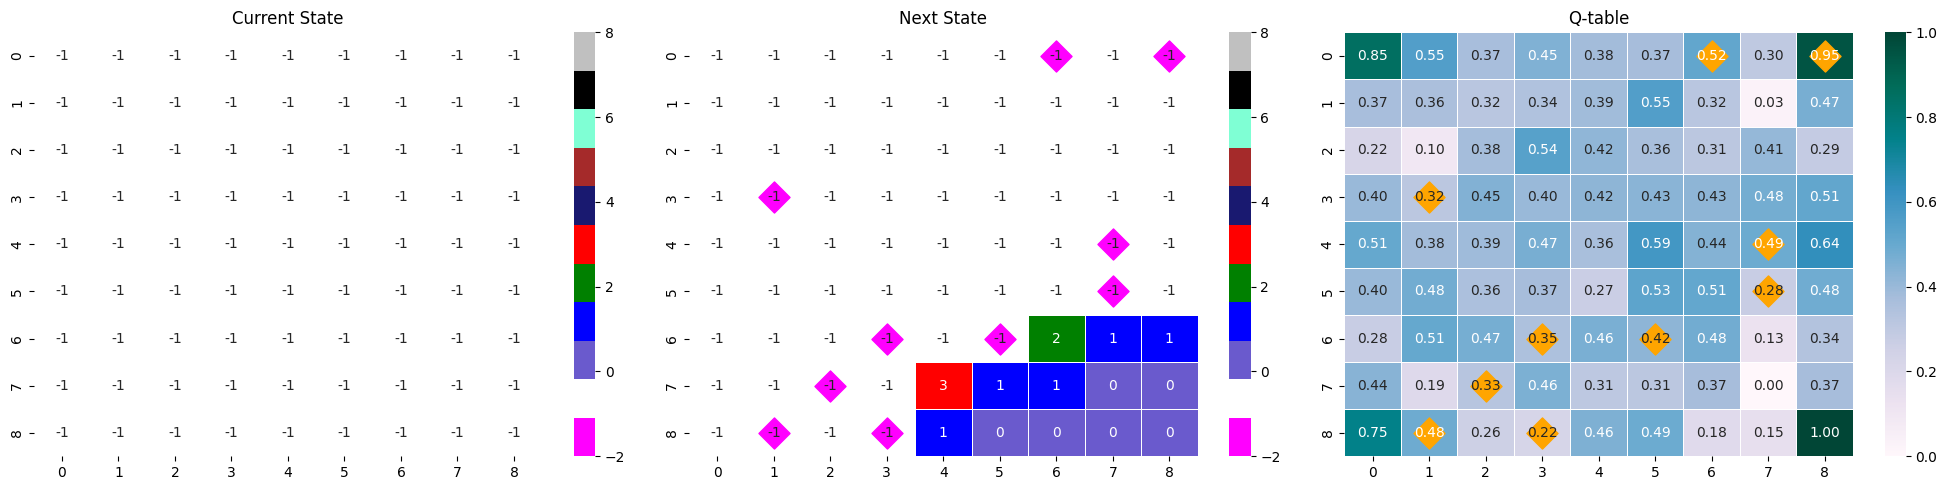

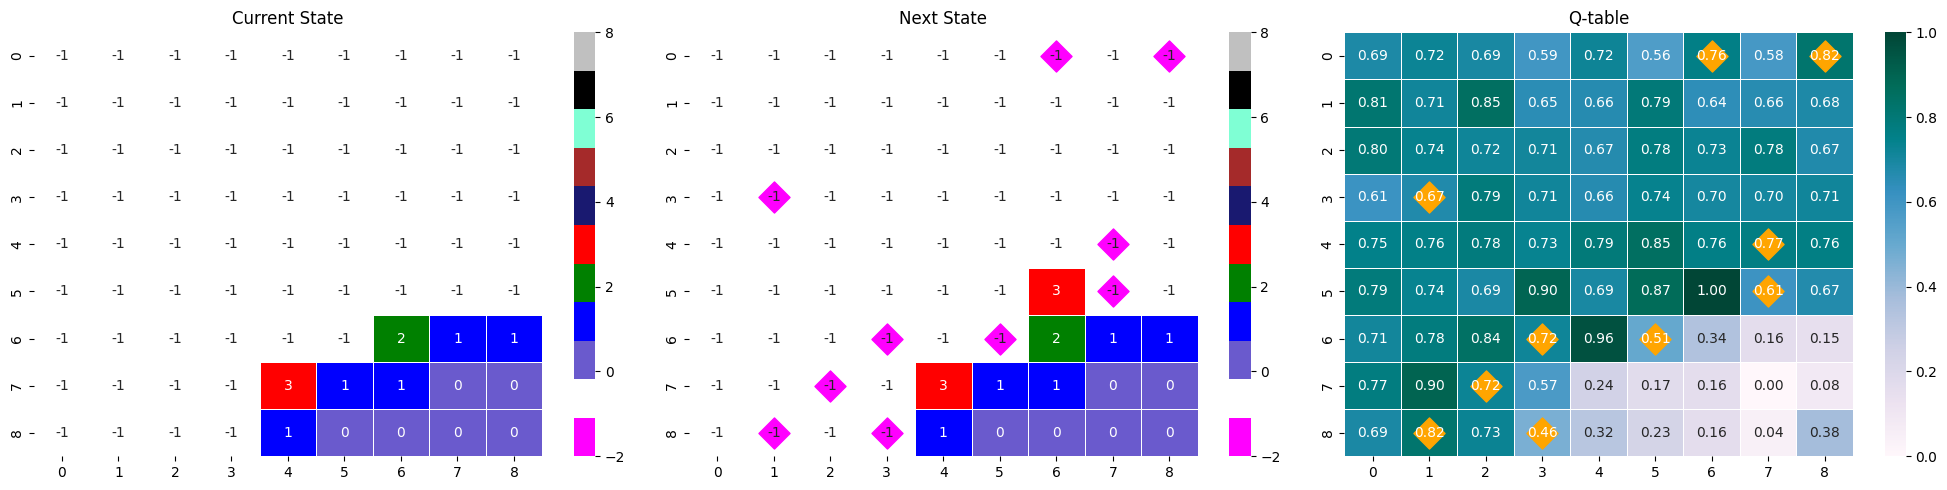

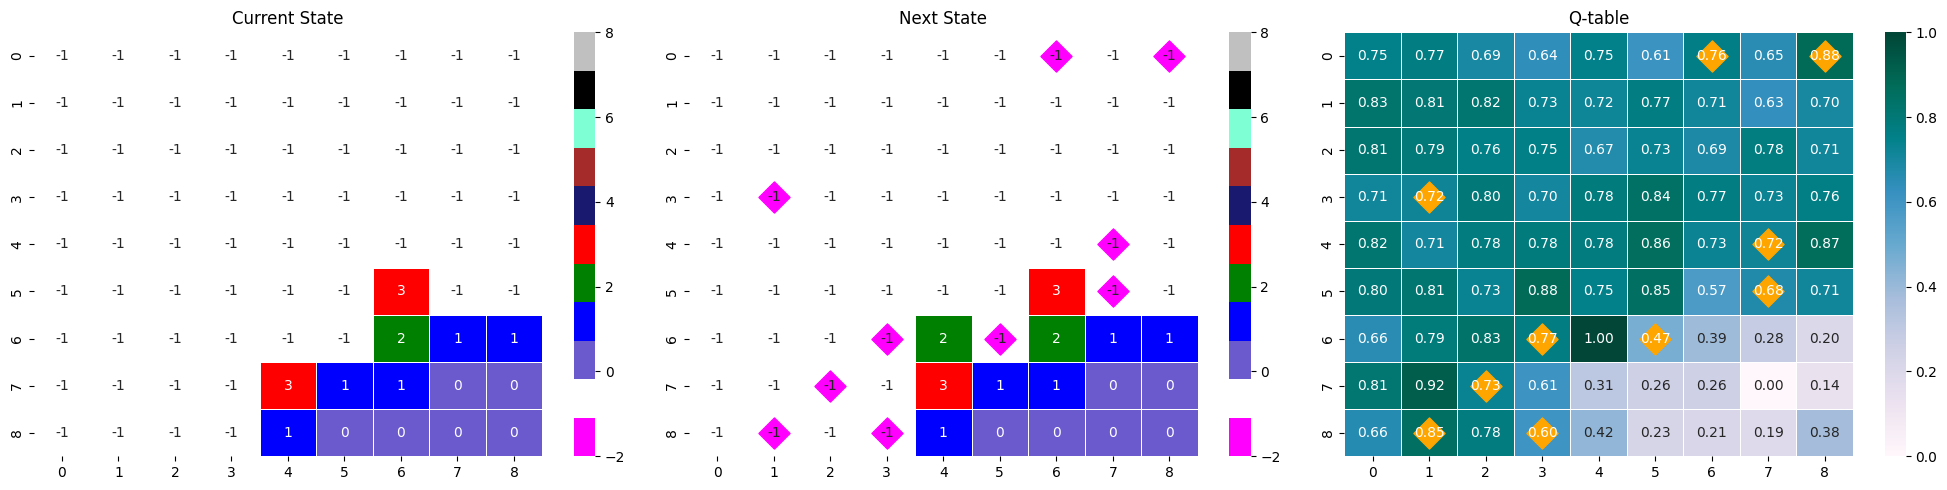

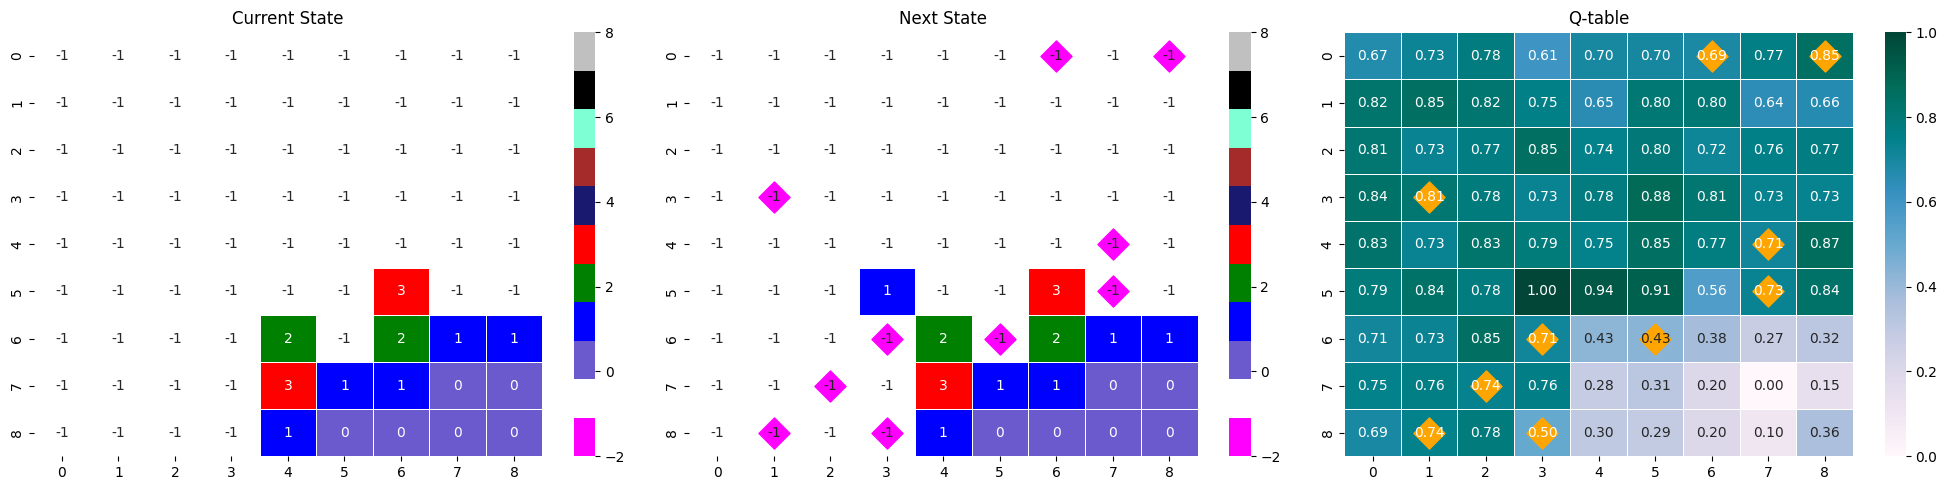

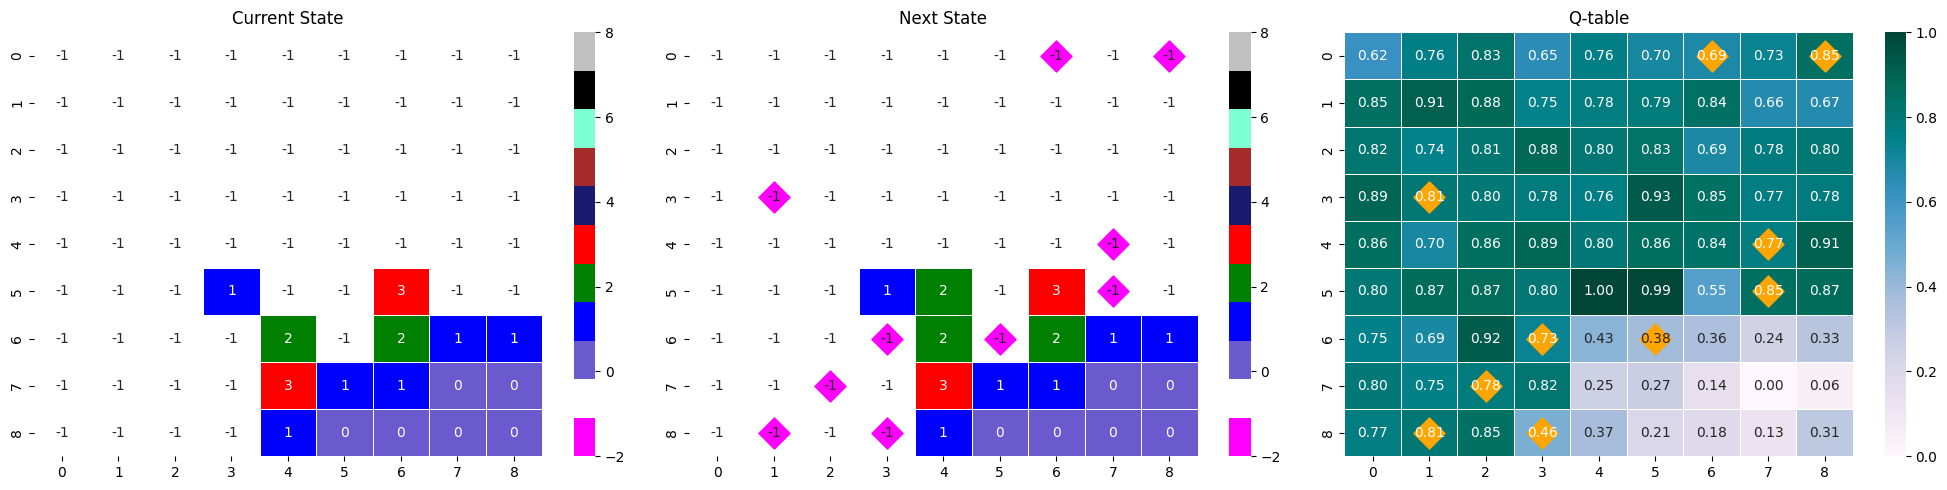

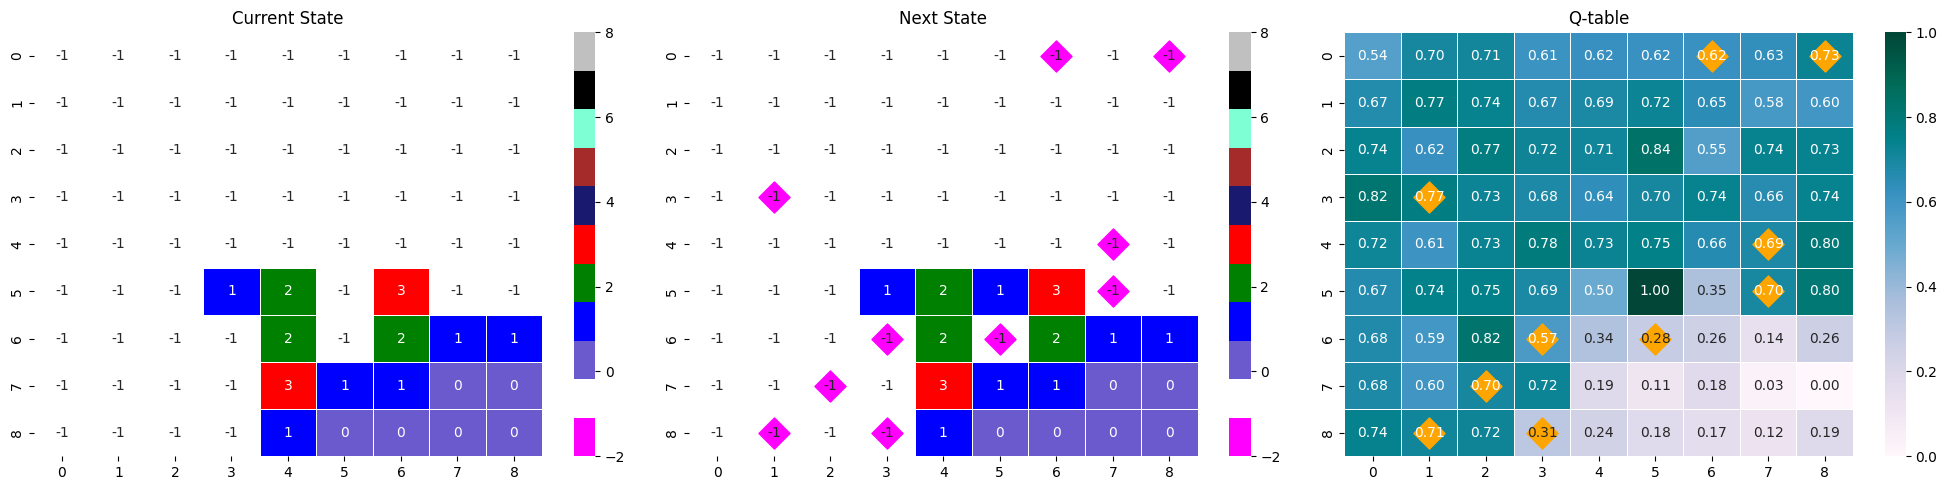

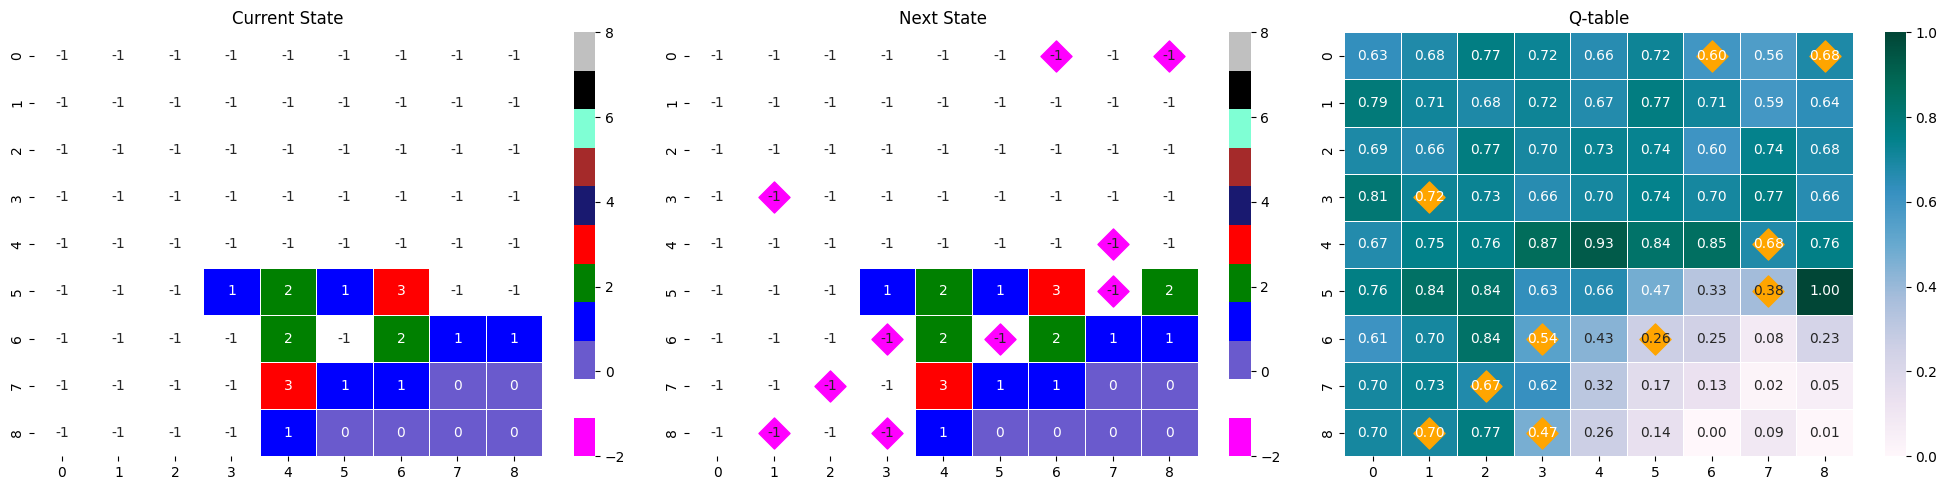

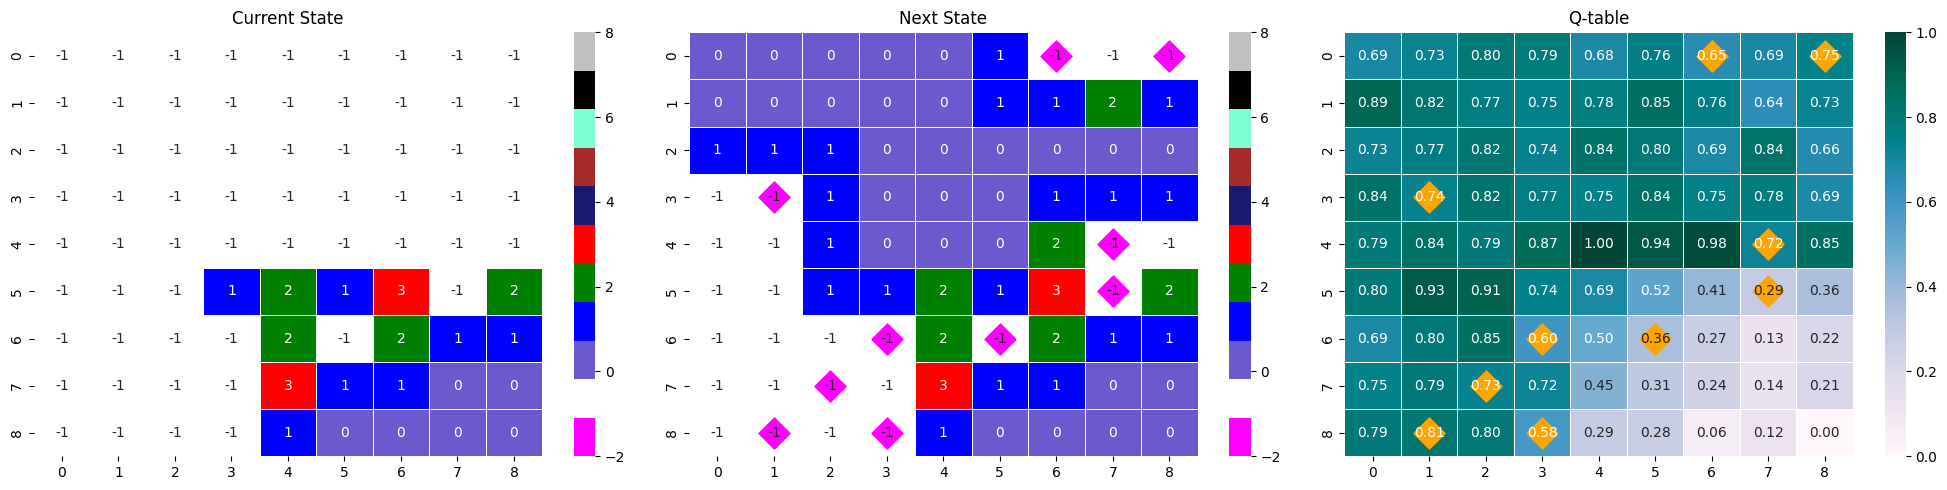

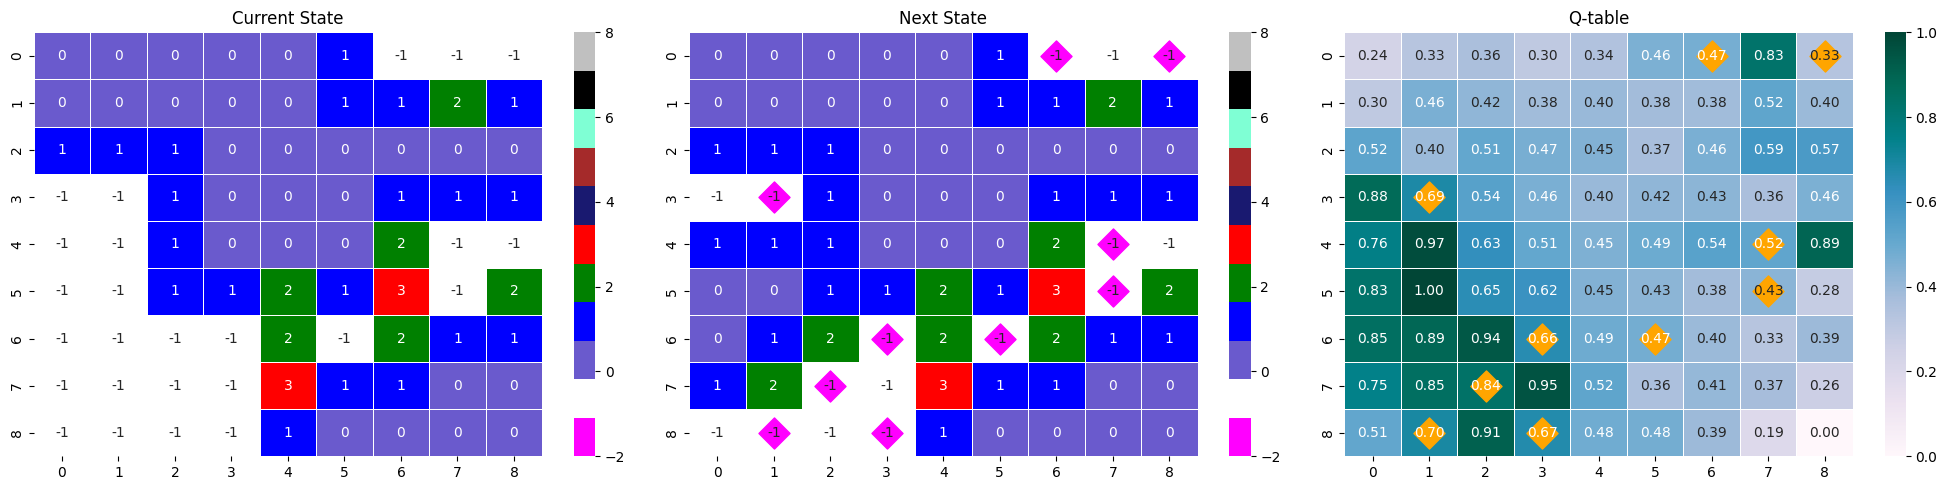

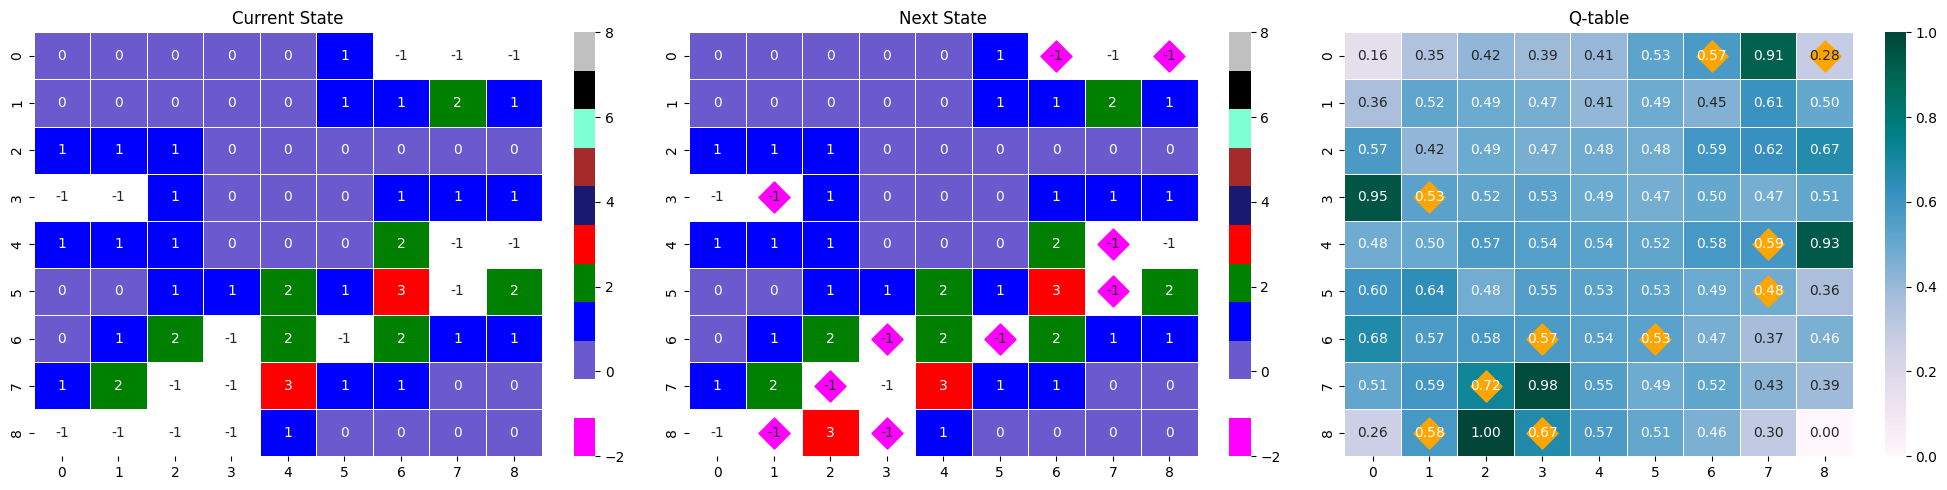

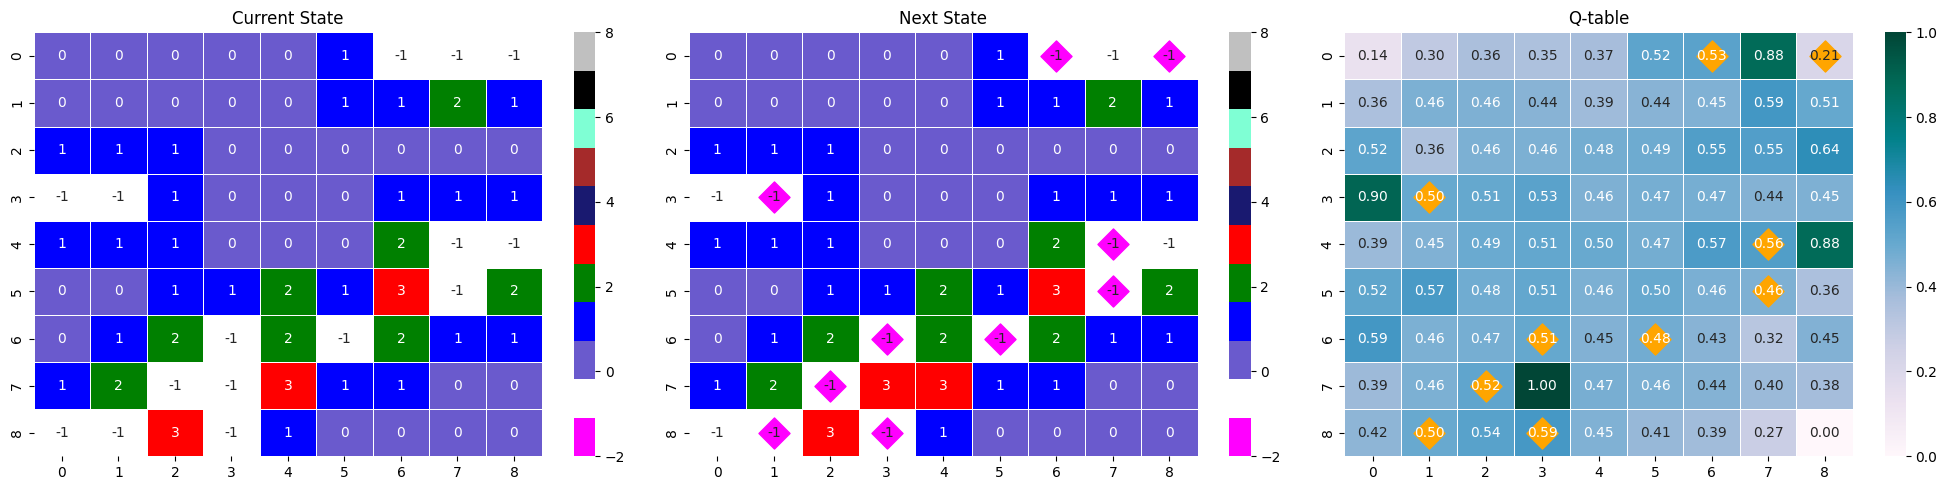

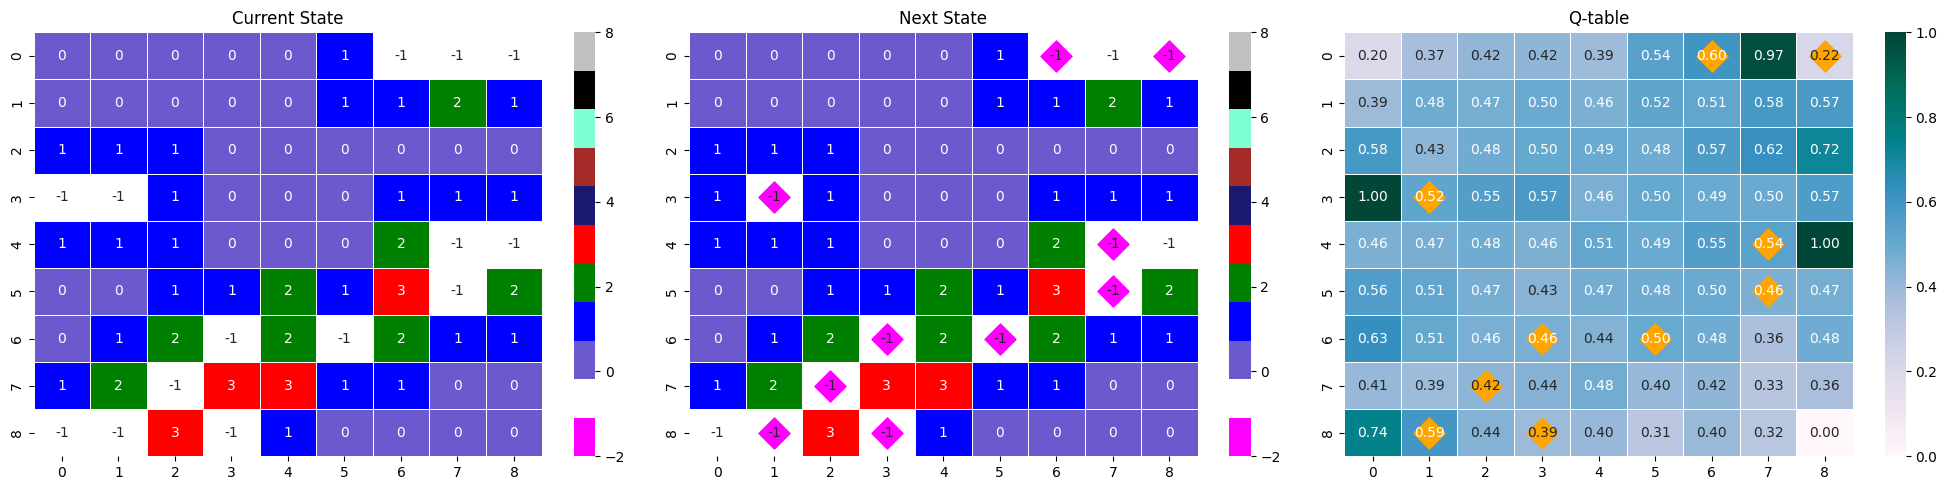

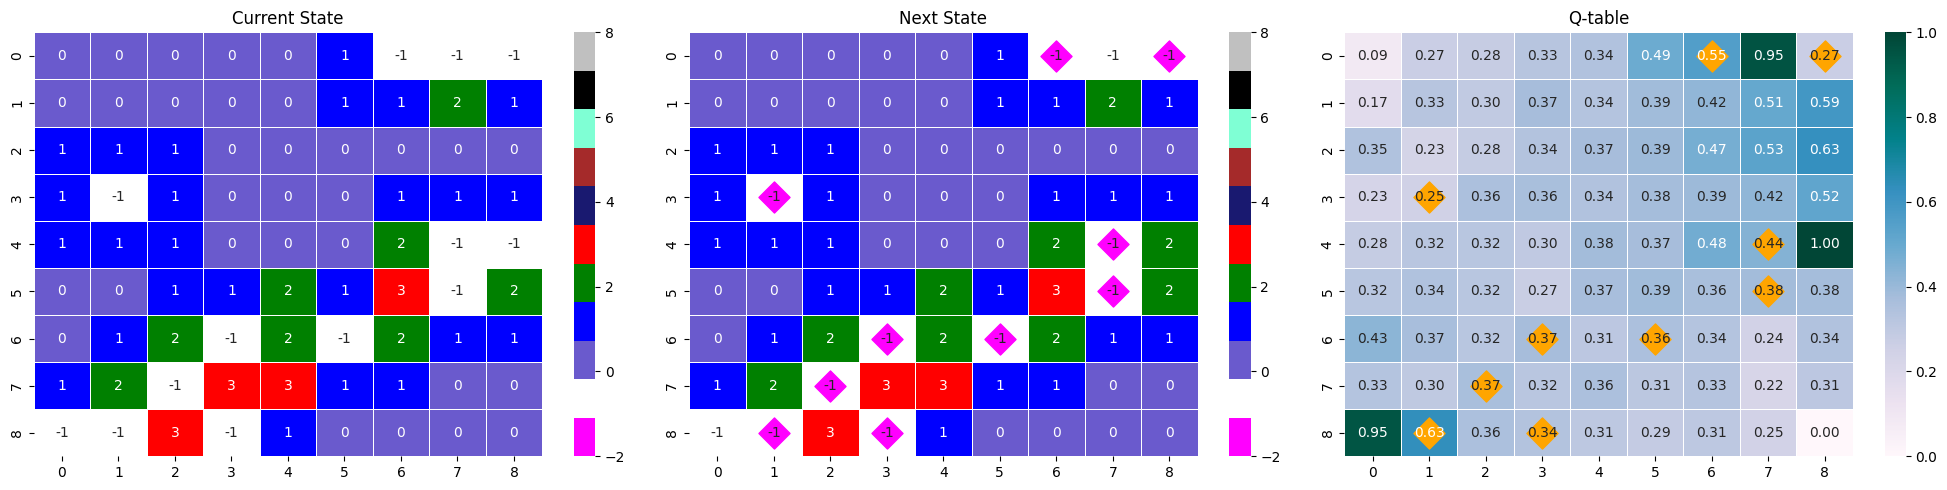

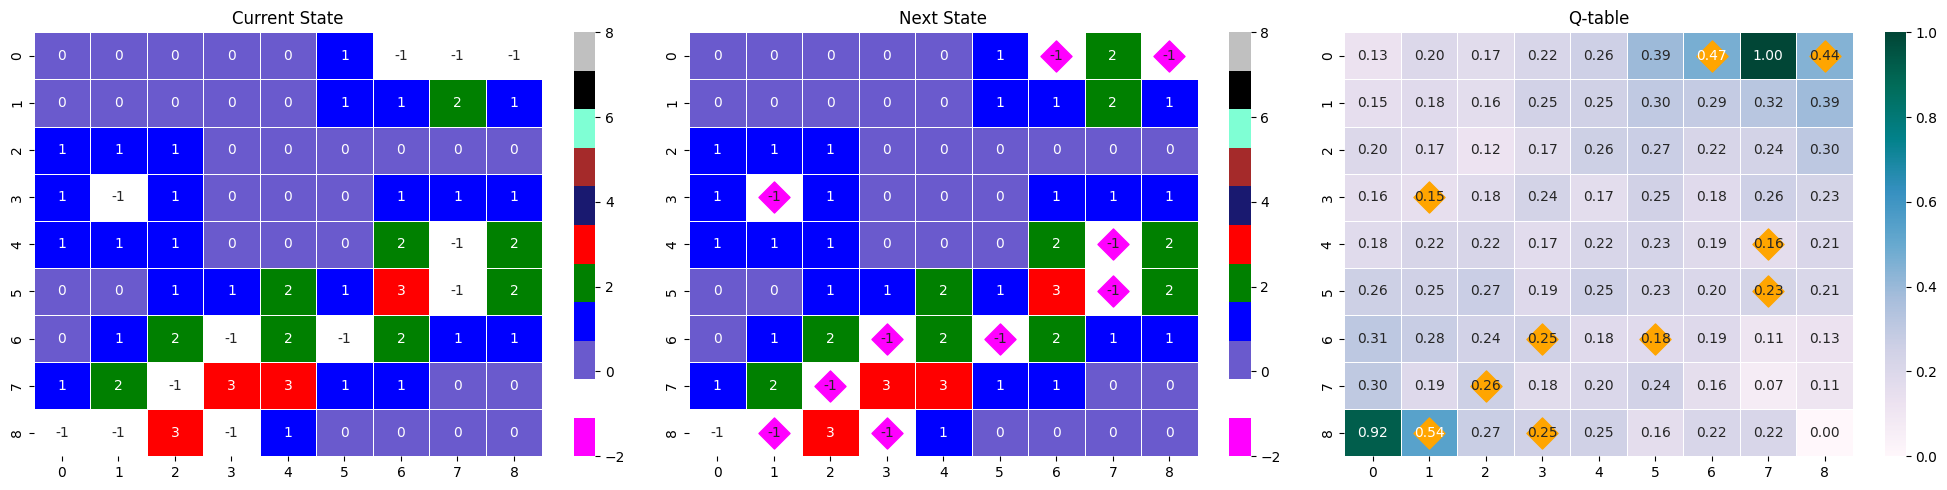

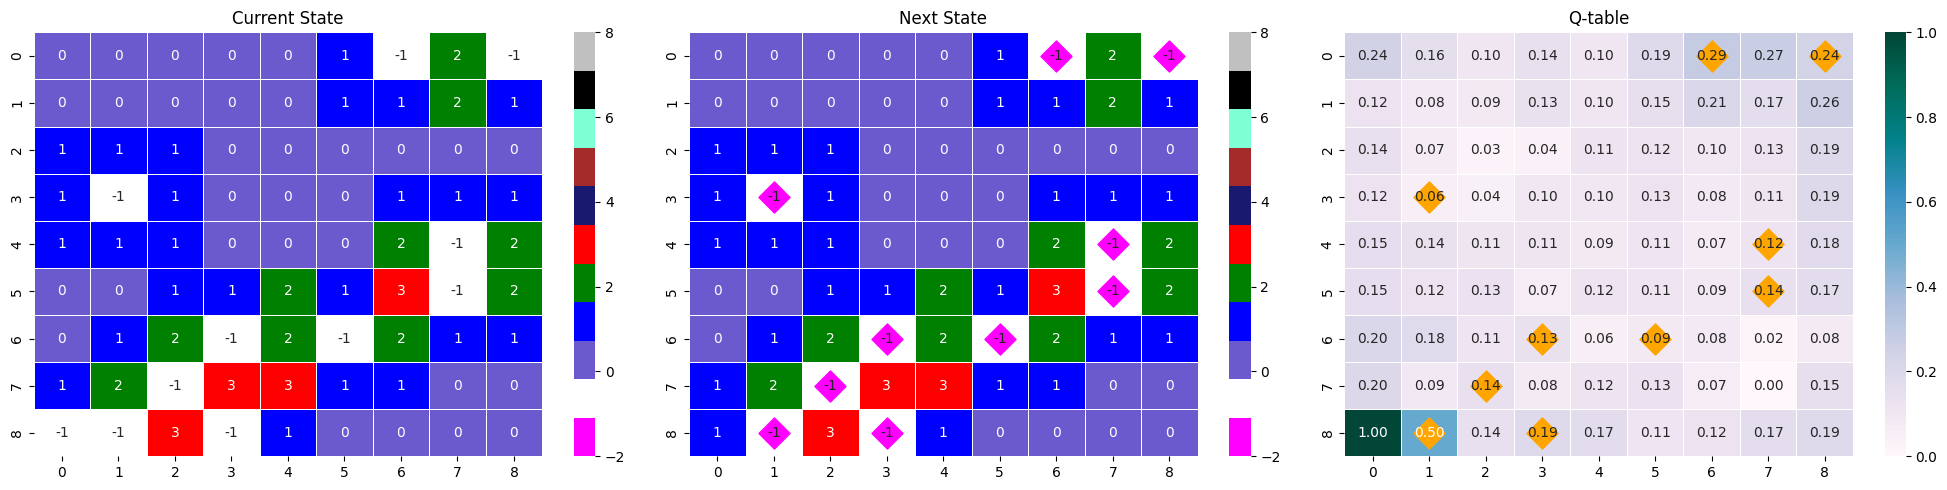

In [ ]:
for idx in range(len(epi_df)):
    tester.visualize_single_step(epi_df.iloc[idx])